In [1586]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.pandas.set_option('display.max_columns', None)  # we want to see all our columns

In [1587]:
train = pd.read_csv(r'train.csv')
df = train.copy() # copy created so that we can access original uncleaned dataset whenever we want to 
df.drop(['SalePrice'], axis=1, inplace=True) #dropping the dependant variable as not needed for feature engineering but still present in 'train' if needed for analysis
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [1588]:
test = pd.read_csv(r'test.csv')
df_test = test.copy()
df_test   #this dataset is missing the output variable column but in reality it will have. For FE purposes anyway we just need the input variables

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

##### We already have a separate train and test dataset but in practice EDA is done on the enitre dataset but post EDA we do train_test_split and then Feature engineering steps are computed and applie only on the TRAINING data(fit_transform) and those operations are simply applied(transform) on the TEST data to avoid Data Leakage.

# 0.) Preliminary Processing

In [1589]:
# AS per EDA drop the variable 'Id' as it is a monotonically increasing variable independant of the trend of the dependant variable so it does not give any useful info
df.drop(['Id'],axis=1,inplace=True)
df_test.drop(['Id'],axis=1,inplace=True)

In [1590]:
# Drop any duplicate rows if present

In [1591]:
#can do datetime preprocessing here but we have done it later

In [1592]:
#preprocess any text,datetime,specially noisy features

# 1.) Missing Values

### First we will deal with non-numerical categorical features

In [1593]:
# See percentage of missing values in each such column

cat_features = [col for col in df.columns if df[col].dtypes=='O']  #all non-numieral categorical variables. Deal with datetime variables separately.

missing_percent = {}

for feature in cat_features:
    missing_percent[feature] = (df[feature].isnull().sum()/len(df)) * 100
    
missing_cat = pd.DataFrame(list(missing_percent.items()))
missing_cat.columns = ['Feature','Percentage of nans']
missing_cat = missing_cat[missing_cat['Percentage of nans']>0]  #filtering out those categorical variables which have 0 nans
missing_cat
    

,Feature,Percentage of nans
2,Alley,93.767123
17,MasVnrType,0.547945
21,BsmtQual,2.534247
22,BsmtCond,2.534247
23,BsmtExposure,2.602740
24,BsmtFinType1,2.534247
25,BsmtFinType2,2.602740
29,Electrical,0.068493
32,FireplaceQu,47.260274
33,GarageType,5.547945


In [1594]:
df['MiscFeature'].isnull().sum()

1406

For the columns like Alley, MiscFeature, PoolQC the number of nan values is too high to use techniques like mode imputation (which will introduce large bias towards majority class) or deleting rows.
We can ideally drop these columns completely or replace the nulls by a new category called 'Missing'. Let's do a quick analysis on which method would prove to be better

In [1595]:
X = df[cat_features]
y = train['SalePrice']

In [1596]:
# testing performance by dropping these columns
X_dropped = X.drop(['Alley','MiscFeature','PoolQC'],axis=1)
X_droped = pd.get_dummies(X_dropped)

In [1597]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_droped, y)

LinearRegression()

In [1598]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y, lin_reg.predict(X_droped))
mse = metrics.mean_squared_error(y, lin_reg.predict(X_droped))
r2 = metrics.r2_score(y, lin_reg.predict(X_droped))

print(f"MAE is {mae}, MSE is {mse} and r2 is {r2}")

MAE is 20720.06301369863, MSE is 935843378.7246575 and r2 is 0.8516133264878061


In [1599]:
# testing performance by retaining these columns and imputing Nans with a new category 'Missing'

In [1600]:
X_retained = pd.get_dummies(X.fillna('Missing'))

In [1601]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_retained, y)

LinearRegression()

In [1602]:
mae = metrics.mean_absolute_error(y, lin_reg.predict(X_retained))
mse = metrics.mean_squared_error(y, lin_reg.predict(X_retained))
r2 = metrics.r2_score(y, lin_reg.predict(X_retained))

print(f"MAE is {mae}, MSE is {mse} and r2 is {r2}")

MAE is 20395.990410958904, MSE is 877116537.6616439 and r2 is 0.8609250134530925


Thus, we see from a rudimentary analysis that retaining these columns and replacing the nans with a new category called 'Missing' will prove to be more beneficial. This proves that eventhough majority of the values in these 3 columns are nulls but these columns still have predicitve importance.

Now, we will fill the columns - 'Alley','MiscFeature','PoolQC' and even 'FireplaceQu' and 'Fence'(since these two also have a lot of nans) with a new category called 'Missing'

For all remaining non-numerical categorical columns we will do mode imputation as the number of nans is very less so wont introduce any bias towards majority class

In [1603]:
for feature in cat_features:
    if feature in ['Alley','MiscFeature','PoolQC','FireplaceQu','Fence']:
        df[feature] = df[feature].fillna('Missing')
        # doing the same operation on the test data but all analysis to determine the imputation technique to use and the actual 
        # value to impute,etc are done solely on training data and just applied to test data
        
        df_test[feature] = df_test[feature].fillna('Missing')
        
    else:
        df[feature] = df[feature].fillna(df[feature].value_counts(ascending=False).index[0])
        
        df_test[feature] = df_test[feature].fillna(df[feature].value_counts(ascending=False).index[0])  #the value being imputed is the one calculated on the training data
        
    

Verifying that both the above imputations happened correctly or not

In [1604]:
train['GarageType'].value_counts(ascending=False,dropna=False)

Attchd     870
Detchd     387
BuiltIn     88
NaN         81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [1605]:
df['GarageType'].value_counts(ascending=False)  #number of nans + number of Attchd instances should = number of Attch instances above

Attchd     951
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [1606]:
train['Alley'].value_counts(ascending=False,dropna=False)

NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

In [1607]:
df['Alley'].value_counts(ascending=False)  #number of nans above = number of Missing instances here

Missing    1369
Grvl         50
Pave         41
Name: Alley, dtype: int64

Verifying if all nulls dealt with for non-numeric categorical columns

In [1608]:
df[cat_features].isnull().sum()  # training set nulls dealt with

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

In [1609]:
df_test[cat_features].isnull().sum()  # test set nulls dealt with

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

## Feature Engineering of Datetime Variables:

- If we had conventional datetime values (object/datetime datatype) values then we could use any of the transformations mentioned in this blog to convert into meaningful features we could use such as year, dayofweek, days since current date,etc based on our use case - https://towardsdatascience.com/feature-engineering-of-datetime-variables-for-data-science-machine-learning-45e611c632ad

- In our case we have 4 Year columns of int datatype which we caught in our EDA phase.
- We can use the 4 year columns as categorical variables and do following imputation:
  
  for feature in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']:
    
    df[feature] = df[feature].fillna(df[feature].value_counts(ascending=False).index[0])
    df_test[feature] = df_test[feature].fillna(df[feature].value_counts(ascending=False).index[0])
    
    BUT
    
- Rather we can create 3 variables as we did in EDA phase and use them as continuous numerical variables instead which proved to be more intuitively informative about trends with our dependant variable as seen in EDA.

 var1 = YrSold - YearBuilt
 
 var2 = YrSold - YearRemodAdd
 
 var3 = YrSold - GarageYrBlt
 
 These 3 will then be treated with our other continuous numerical variables

Let's deal with the 4 year/datetime variables first we found during our EDA - these are actually int/float types right now so be sure to keep track of this fact and dont accidentally treat them as continuous numerical variables.

Datetime variables no matter in which from have to be treated separately. So keep a track becuase they wont by default be in datetime format.

In [1610]:
for feature in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    df[feature] = df['YrSold'] - df[feature]
    df_test[feature] = df_test['YrSold'] - df_test[feature]

In [1611]:
df.drop(['YrSold'],axis=1,inplace=True)  #dropping the YrSold column as its effect has been captured in our 3 new variables
df_test.drop(['YrSold'],axis=1,inplace=True)

In [1612]:
df[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']].isna().sum()

YearBuilt        0
YearRemodAdd     0
GarageYrBlt     81
dtype: int64

In [1613]:
df_test[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']].isna().sum()

YearBuilt        0
YearRemodAdd     0
GarageYrBlt     78
dtype: int64

Since we have choosen to convert our datetime values to continuous numerical features we will deal with them all together

## Dealing with categorical numerical features

In [1614]:
# discarding all our non-numeric (object) categorical variables 
df.loc[:,~df.columns.isin(cat_features)].dtypes

MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
dtype: object

Figuring out among the remaining features which are all numerical how many can be considered categorical. Setting the threshold at 15 unique categories

In [1615]:
# discarding all our non-numeric (object) categorical variables + all the datetime variables which we dealt with separately (they are also int columns so be careful to list them out explicitly)
non_object_vars = df.loc[:,~df.columns.isin(cat_features)].columns

In [1616]:
len(non_object_vars)  #remaining numerical variables excluding the dependant variable and our non-numeric categorical vairbales

35

In [1617]:
non_object_vars

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold'],
      dtype='object')

In [1618]:
non_object_vars_cat = [] # numerical variables that can be considered as categorical variables
for feature in non_object_vars:
    if len(df[feature].unique())<=15:
        non_object_vars_cat.append(feature)

In [1619]:
len(non_object_vars_cat)

14

In [1620]:
# finding percentage of missing values in NUMERICAL CATEGORICAL features

missing_percent = {}

for feature in non_object_vars_cat:
    missing_percent[feature] = (df[feature].isnull().sum()/len(df)) * 100
    
missing_cat = pd.DataFrame(list(missing_percent.items()))
missing_cat.columns = ['Feature','Percentage of nans']
missing_cat

,Feature,Percentage of nans
0,MSSubClass,0.0
1,OverallQual,0.0
2,OverallCond,0.0
3,BsmtFullBath,0.0
4,BsmtHalfBath,0.0
5,FullBath,0.0
6,HalfBath,0.0
7,BedroomAbvGr,0.0
8,KitchenAbvGr,0.0
9,TotRmsAbvGrd,0.0


In [1621]:
df[non_object_vars_cat].isnull().sum()

MSSubClass      0
OverallQual     0
OverallCond     0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
TotRmsAbvGrd    0
Fireplaces      0
GarageCars      0
PoolArea        0
MoSold          0
dtype: int64

In [1622]:
df_test[non_object_vars_cat].isnull().sum()

MSSubClass      0
OverallQual     0
OverallCond     0
BsmtFullBath    2
BsmtHalfBath    2
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
TotRmsAbvGrd    0
Fireplaces      0
GarageCars      1
PoolArea        0
MoSold          0
dtype: int64

Our CATEGORICAL NUMERICAL features dont have any nan values so can proceed further so we dont need to use any imputation technique. We can see our test data does have some missing values but since our training sample(majority of the population) didnt have any missing data we can conclude that the missing data in the test data is MCAR so we can drop these rows as they are very few in number

In [1623]:
len(df_test)

1459

In [1624]:
df_test.dropna(how='any', subset=non_object_vars_cat, inplace=True)

In [1625]:
len(df_test)

1456

Verifying if all nulls in train and test data Numerical Categorical columns are dealt with or not

In [1626]:
df[non_object_vars_cat].isnull().sum()

MSSubClass      0
OverallQual     0
OverallCond     0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
TotRmsAbvGrd    0
Fireplaces      0
GarageCars      0
PoolArea        0
MoSold          0
dtype: int64

In [1627]:
df_test[non_object_vars_cat].isnull().sum()

MSSubClass      0
OverallQual     0
OverallCond     0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
TotRmsAbvGrd    0
Fireplaces      0
GarageCars      0
PoolArea        0
MoSold          0
dtype: int64

Thus, we have dealt with nulls for our numerical categorical variables in both train and test data

## Dealing with Continuous Numerical features

In [1628]:
len(set(non_object_vars) - set(non_object_vars_cat))

21

In [1629]:
cont_num_features = set(non_object_vars) - set(non_object_vars_cat)  #list of our Continuous Numerical Features
cont_num_features

{'1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'EnclosedPorch',
 'GarageArea',
 'GarageYrBlt',
 'GrLivArea',
 'LotArea',
 'LotFrontage',
 'LowQualFinSF',
 'MasVnrArea',
 'MiscVal',
 'OpenPorchSF',
 'ScreenPorch',
 'TotalBsmtSF',
 'WoodDeckSF',
 'YearBuilt',
 'YearRemodAdd'}

In [1630]:
df[cont_num_features].isnull().sum()

C:\Users\Atul\AppData\Local\Temp\ipykernel_19212\1097785204.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df[cont_num_features].isnull().sum()


MiscVal            0
TotalBsmtSF        0
GarageYrBlt       81
2ndFlrSF           0
OpenPorchSF        0
1stFlrSF           0
LotFrontage      259
BsmtUnfSF          0
YearBuilt          0
EnclosedPorch      0
BsmtFinSF2         0
YearRemodAdd       0
BsmtFinSF1         0
MasVnrArea         8
GrLivArea          0
ScreenPorch        0
GarageArea         0
WoodDeckSF         0
3SsnPorch          0
LotArea            0
LowQualFinSF       0
dtype: int64

In [1631]:
print(f"Percentage of null values in GarageYrBlt column is {((df[cont_num_features].isnull().sum().loc['GarageYrBlt'])/len(df))*100}")
print(f"Percentage of null values in LotFrontage column is {((df[cont_num_features].isnull().sum().loc['LotFrontage'])/len(df))*100}")
print(f"Percentage of null values in MasVnrArea column is {((df[cont_num_features].isnull().sum().loc['MasVnrArea'])/len(df))*100}")

Percentage of null values in GarageYrBlt column is 5.5479452054794525
Percentage of null values in LotFrontage column is 17.73972602739726
Percentage of null values in MasVnrArea column is 0.547945205479452


C:\Users\Atul\AppData\Local\Temp\ipykernel_19212\1126606077.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  print(f"Percentage of null values in GarageYrBlt column is {((df[cont_num_features].isnull().sum().loc['GarageYrBlt'])/len(df))*100}")
C:\Users\Atul\AppData\Local\Temp\ipykernel_19212\1126606077.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  print(f"Percentage of null values in LotFrontage column is {((df[cont_num_features].isnull().sum().loc['LotFrontage'])/len(df))*100}")
C:\Users\Atul\AppData\Local\Temp\ipykernel_19212\1126606077.py:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  print(f"Percentage of null values in MasVnrArea column is {((df[cont_num_features].isnull().sum().loc['MasVnrArea'])/len(df))*100}")


Our GarageYrBlt,LotFrontage and MasVnr variables has Nan values and the number of missing values is considerably low so we can do either mean or median imputation. If graph is skewed then we do median imputation otherwise we can do mean imputation

C:\Users\Atul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Atul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Atul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

<AxesSubplot:xlabel='MasVnrArea', ylabel='Density'>

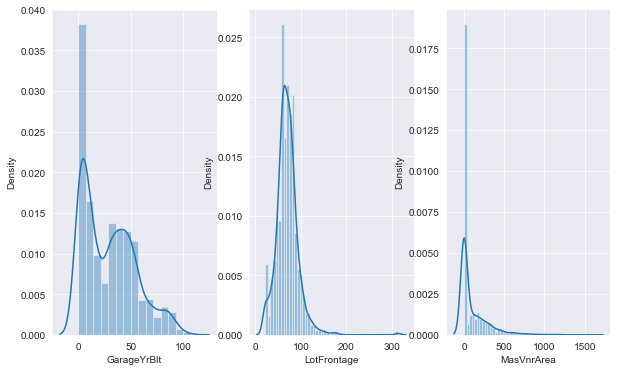

In [1632]:
plt.figure(figsize = (10,6))
plt.subplot(1,3,1)
sns.distplot(df['GarageYrBlt'])
plt.subplot(1,3,2)
sns.distplot(df['LotFrontage'])
plt.subplot(1,3,3)
sns.distplot(df['MasVnrArea'])

Checking if variable is normally distirbuted using Q-Q plot. If all points lie along red line then it is otherwise it's not

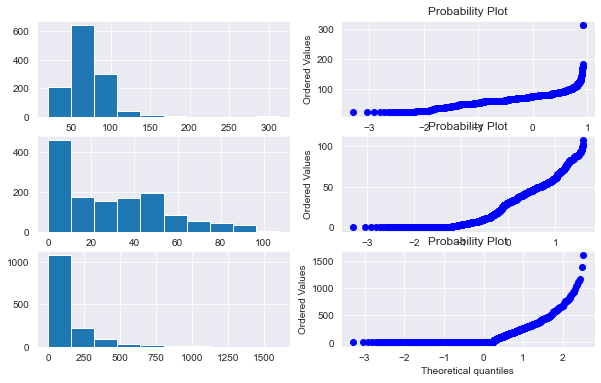

In [1633]:
import scipy.stats as stat
import pylab

plt.figure(figsize = (10,6))
plt.subplot(3,2,1)
df['LotFrontage'].hist()
plt.subplot(3,2,2)
stat.probplot(df['LotFrontage'], dist='norm',plot=pylab)   #Q-Q plot.

plt.subplot(3,2,3)
df['GarageYrBlt'].hist()
plt.subplot(3,2,4)
stat.probplot(df['GarageYrBlt'], dist='norm',plot=pylab)   #Q-Q plot.

plt.subplot(3,2,5)
df['MasVnrArea'].hist()
plt.subplot(3,2,6)
stat.probplot(df['MasVnrArea'], dist='norm',plot=pylab)   #Q-Q plot.

plt.show()


From above Q-Q plot we can determine that the variables are not normally distirbuted and is skewed so we use MEDIAN IMPUTATION (Use median if data is skewed and even if there are lot of outliers - both are true in our case)

In [1634]:
df_test[cont_num_features].isnull().sum()

C:\Users\Atul\AppData\Local\Temp\ipykernel_19212\1158515332.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_test[cont_num_features].isnull().sum()


MiscVal            0
TotalBsmtSF        0
GarageYrBlt       77
2ndFlrSF           0
OpenPorchSF        0
1stFlrSF           0
LotFrontage      227
BsmtUnfSF          0
YearBuilt          0
EnclosedPorch      0
BsmtFinSF2         0
YearRemodAdd       0
BsmtFinSF1         0
MasVnrArea        15
GrLivArea          0
ScreenPorch        0
GarageArea         0
WoodDeckSF         0
3SsnPorch          0
LotArea            0
LowQualFinSF       0
dtype: int64

In [1635]:
# Once we have fixed our imputatuon straegy i.e. Median Imputation - we will use this on all columns as eventhough on the training
# data only LotFrontage has missing values but in test data more columns have missing values. So our imputation strategy is 
# determined based on observations on the TRAIN data and the strategy is applied across all data columns for which this particular
# imputation strategy was chosen.
# If a particular column has missing values in train set then the flag column created in both train and test data. If
# a column has missing values only in test data column the simple imputation done and a new column not created

for feature in cont_num_features:
    if df[feature].isna().sum()>0:
        
        # Creating a new column flagging the presence of nulls and then doing median imputation - can also do median
        # imputation without creating this flag column most of the times but this method retains the importance of the replaced null values
        df[feature+'_nan_present'] = np.where(df[feature].isnull(), 1 ,0)
        df_test[feature+'_nan_present'] = np.where(df_test[feature].isnull(), 1, 0)
        
        df[feature] = df[feature].fillna(df[feature].median())
        df_test[feature] = df_test[feature].fillna(df[feature].median())  #the median value of the train column is imputed in the test column
        
        
        
    elif df_test[feature].isna().sum()>0:
        
        df_test[feature] = df_test[feature].fillna(df[feature].median()) #if there are missing values only in a particular column in the test data then impute it using train set column's median but DONT create a new flag column as the train data did not have missing values for that column

Verifying if flag columns created above are behaving correctly

In [1636]:
print(len(df[df['LotFrontage_nan_present']==1])) # should be 259
print(len(df_test[df_test['LotFrontage_nan_present']==1])) # should be 227
print(len(df[df['MasVnrArea_nan_present']==1])) # should be 8
print(len(df_test[df_test['MasVnrArea_nan_present']==1])) # should be 15
print(len(df[df['GarageYrBlt_nan_present']==1])) # should be 81
print(len(df_test[df_test['GarageYrBlt_nan_present']==1])) # should be 77
print(df.shape[1]) #should be 82 as 3 new columns added
print(df_test.shape[1]) #should be 82 as 3 new columns added


259
227
8
15
81
77
81
81


Verifying if we have dealt with all nulls in train and test data for all CONTINUOUS NUMERICAL columns

In [1637]:
df[cont_num_features].isnull().sum()

C:\Users\Atul\AppData\Local\Temp\ipykernel_19212\1097785204.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df[cont_num_features].isnull().sum()


MiscVal          0
TotalBsmtSF      0
GarageYrBlt      0
2ndFlrSF         0
OpenPorchSF      0
1stFlrSF         0
LotFrontage      0
BsmtUnfSF        0
YearBuilt        0
EnclosedPorch    0
BsmtFinSF2       0
YearRemodAdd     0
BsmtFinSF1       0
MasVnrArea       0
GrLivArea        0
ScreenPorch      0
GarageArea       0
WoodDeckSF       0
3SsnPorch        0
LotArea          0
LowQualFinSF     0
dtype: int64

In [1638]:
df_test[cont_num_features].isnull().sum()

C:\Users\Atul\AppData\Local\Temp\ipykernel_19212\1158515332.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_test[cont_num_features].isnull().sum()


MiscVal          0
TotalBsmtSF      0
GarageYrBlt      0
2ndFlrSF         0
OpenPorchSF      0
1stFlrSF         0
LotFrontage      0
BsmtUnfSF        0
YearBuilt        0
EnclosedPorch    0
BsmtFinSF2       0
YearRemodAdd     0
BsmtFinSF1       0
MasVnrArea       0
GrLivArea        0
ScreenPorch      0
GarageArea       0
WoodDeckSF       0
3SsnPorch        0
LotArea          0
LowQualFinSF     0
dtype: int64

The nulls of the CONTINUOUS NUMERICAL features have also been dealth with effectively

Verifying that all missing values have been delt with effectively

In [1639]:
temp = pd.DataFrame(df.isnull().sum())
temp.columns = ['number of nulls']
temp[temp['number of nulls']>0]

,number of nulls


In [1640]:
temp = pd.DataFrame(df_test.isnull().sum())
temp.columns = ['number of nulls']
temp[temp['number of nulls']>0]

,number of nulls


In [1641]:
# seeing how much data is lost

In [1642]:
len(df)  #no rows lost

1460

In [1643]:
len(df_test) # 3 rows dropped which is not bad

1456

## -------------------------------------------------------------------------------------------------------------------------------

# 2.) Transforming continuous variables to Gaussian Distribution

Plotting distribution of the continuous numerical variables  - do in EDA step ideally

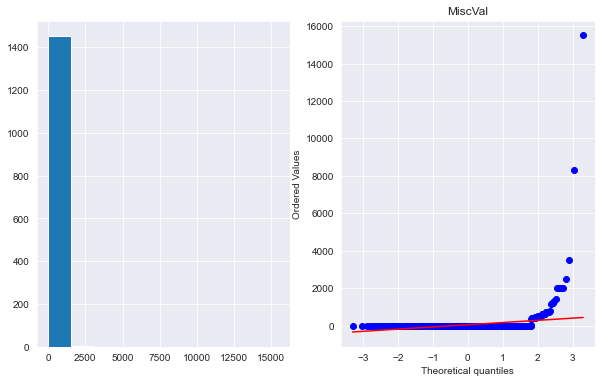

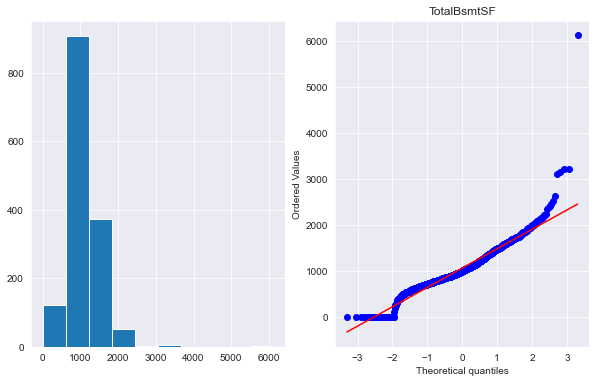

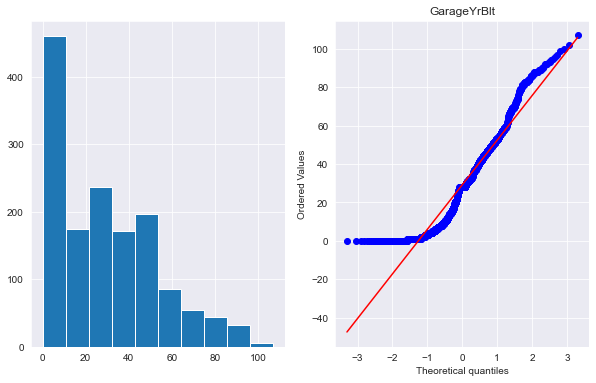

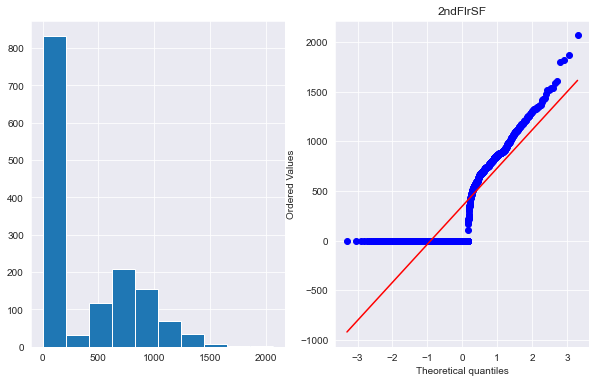

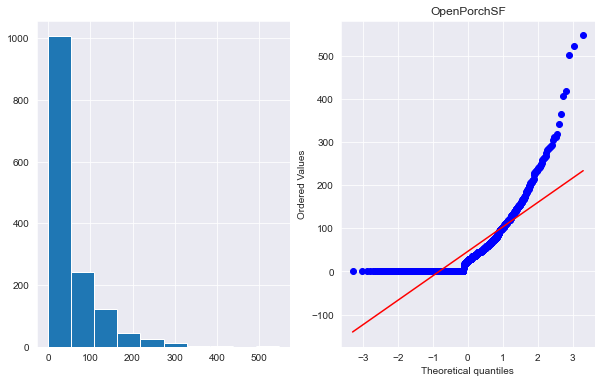

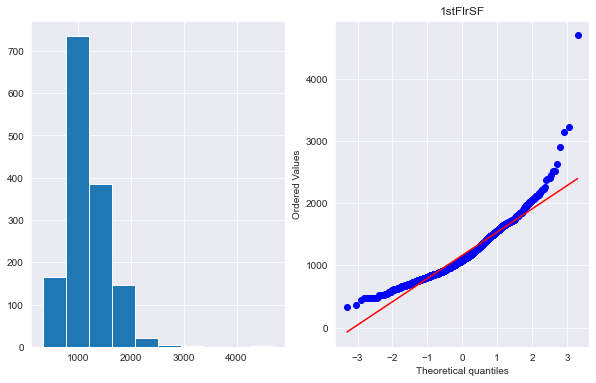

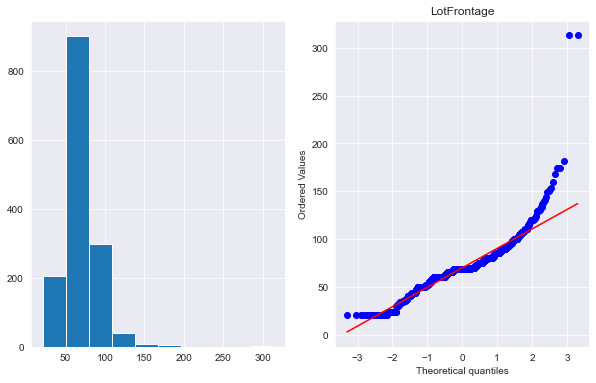

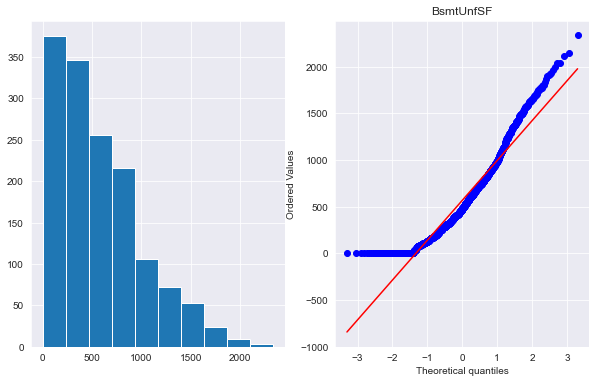

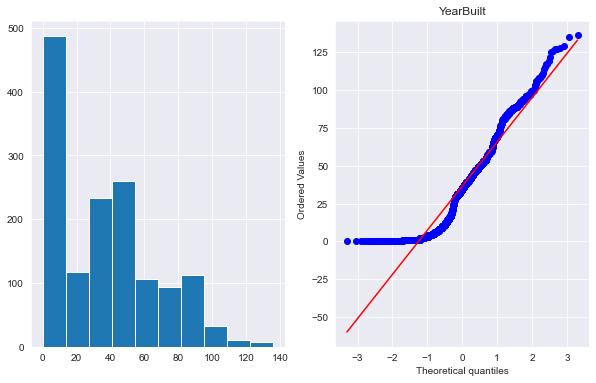

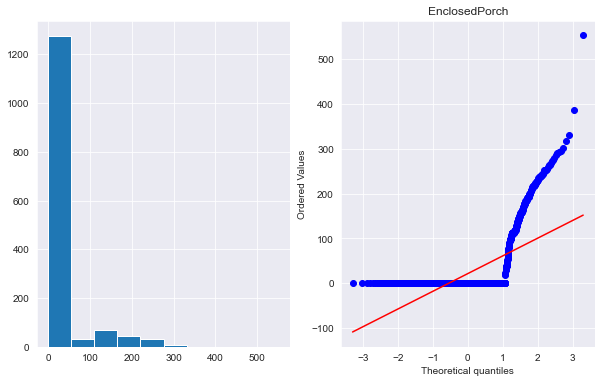

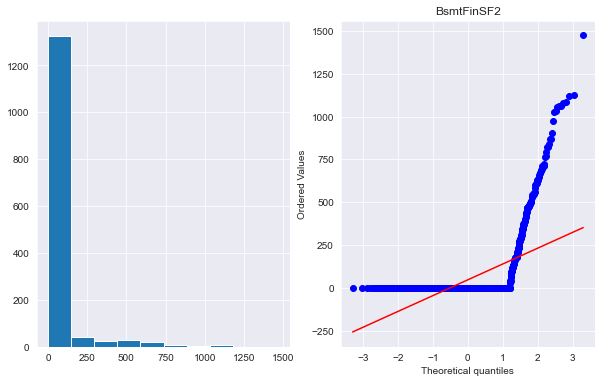

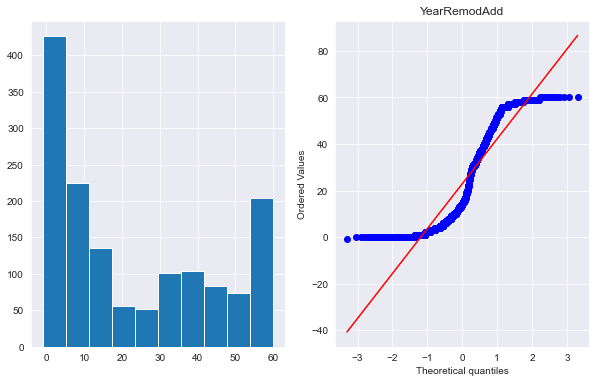

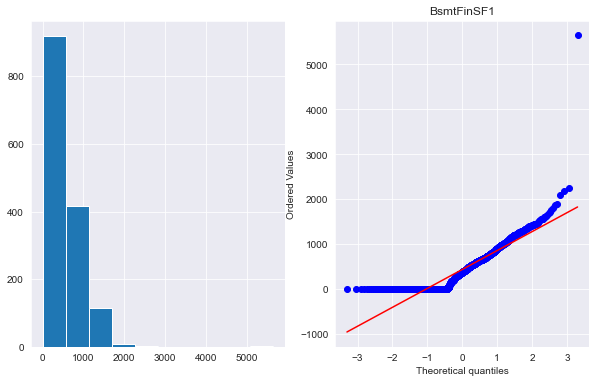

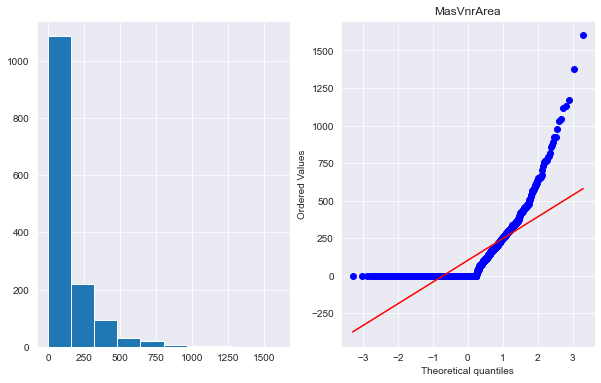

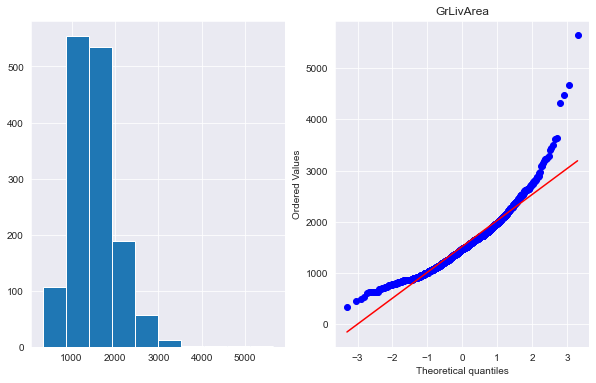

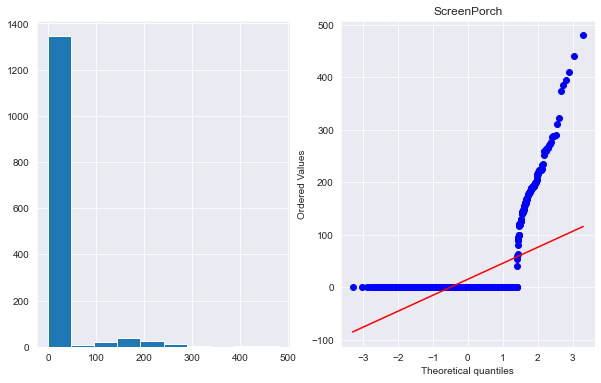

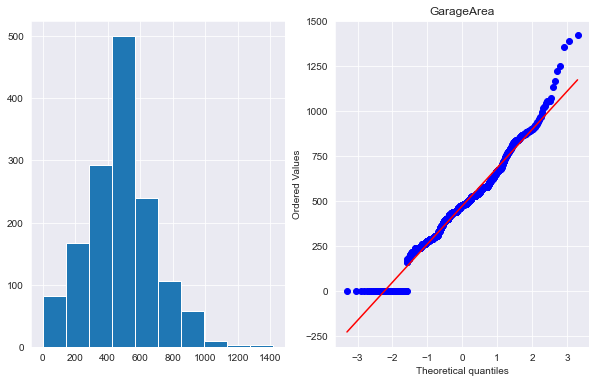

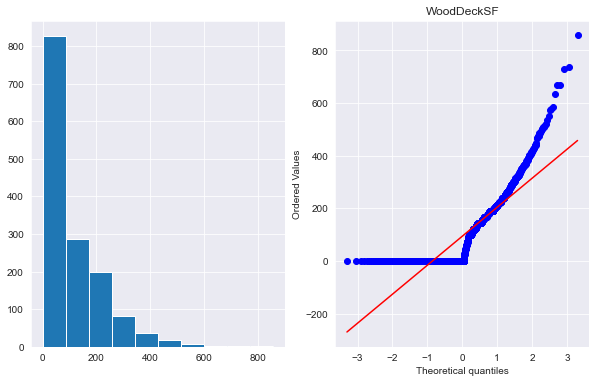

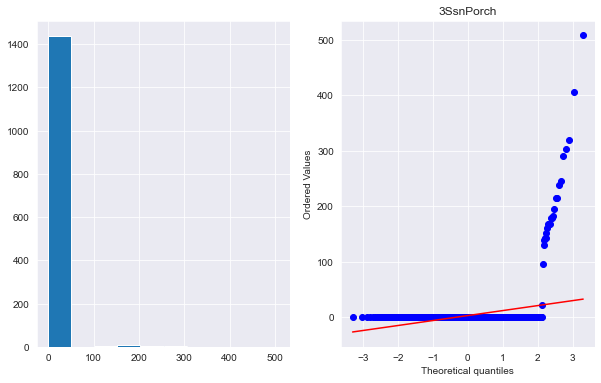

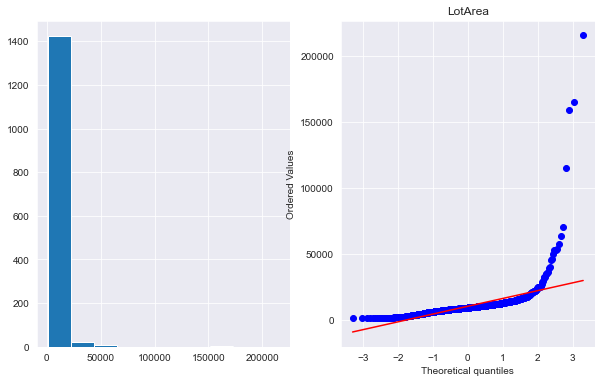

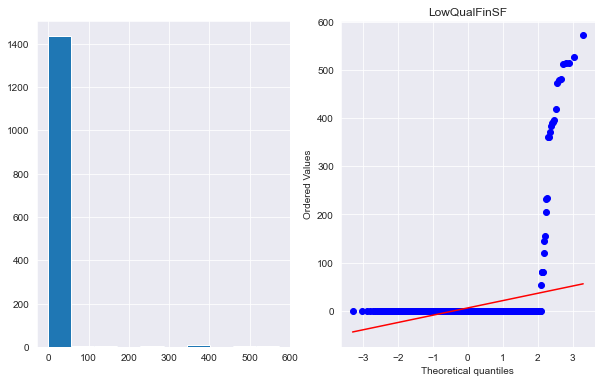

In [1644]:
import scipy.stats as stat
import pylab

def plot_figure(df, feature):
    plt.figure(figsize = (10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature], dist='norm',plot=pylab)
    plt.title(feature)
    plt.show()

for feature in cont_num_features:
    plot_figure(df, feature)

We will try all gaussian transformations on the numerical variables train data and whichever gives best results we will apply on final train and test data

### Log Transform

In [1645]:
df_temp = df.copy()

In [1646]:
for feature in cont_num_features:
    if len(df_temp[df_temp[feature]<0])>0:   # if negative values present in a variable then have to do this as negative log is infinity
        df_temp[feature] = np.log10(df_temp[feature]+1-min(df_temp[feature]))
        
    else:
        if len(df_temp[df_temp[feature]==0])>0:    # if 0 value present then do this
            df_temp[feature] = np.log1p(df_temp[feature])
        else:
            df_temp[feature] = np.log(df_temp[feature])

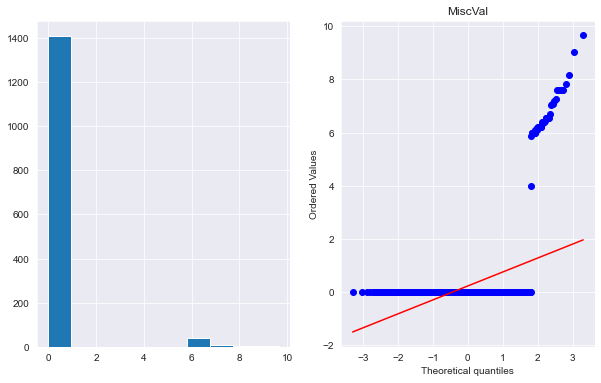

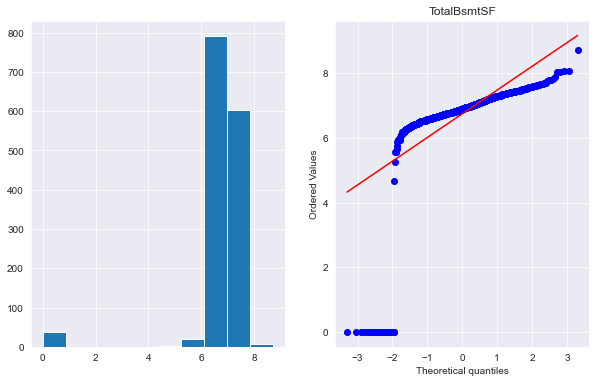

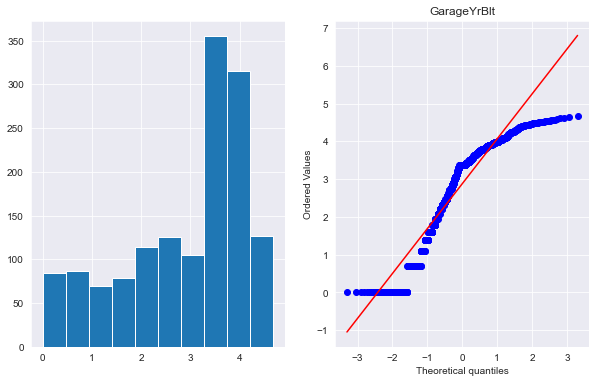

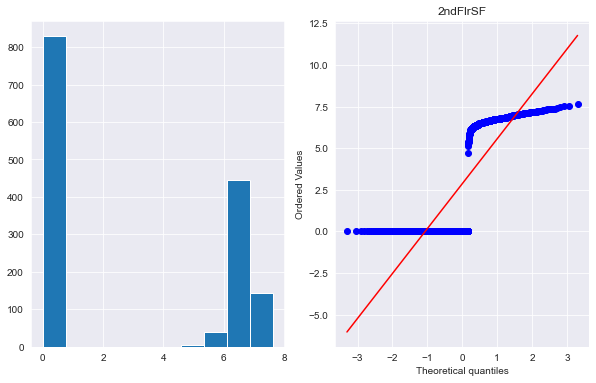

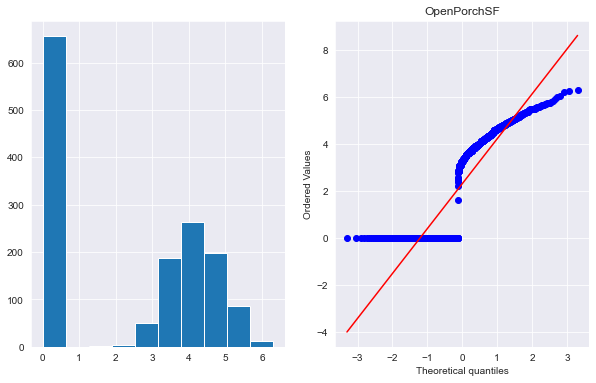

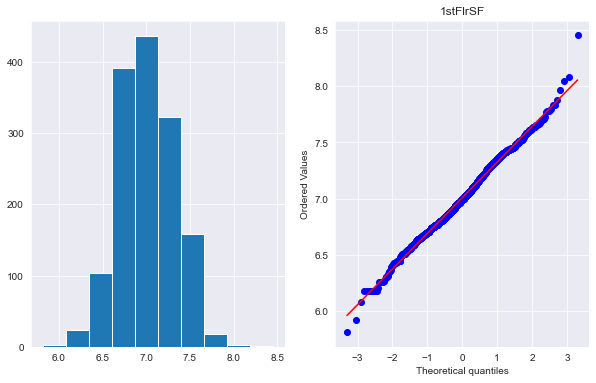

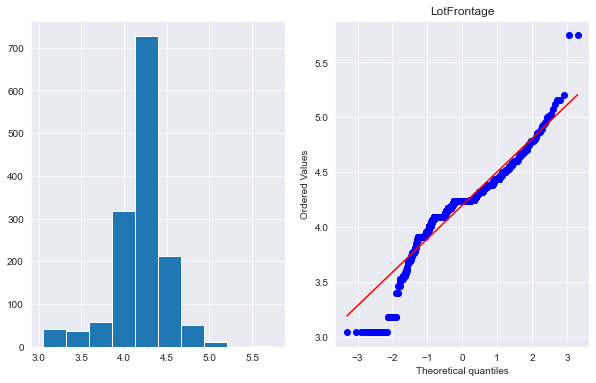

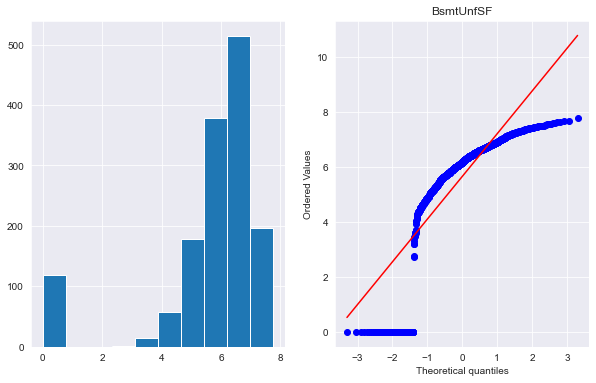

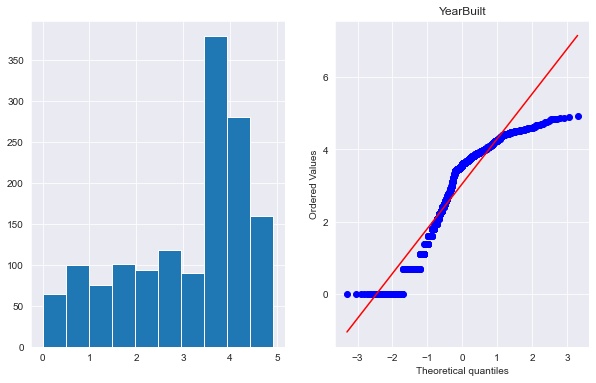

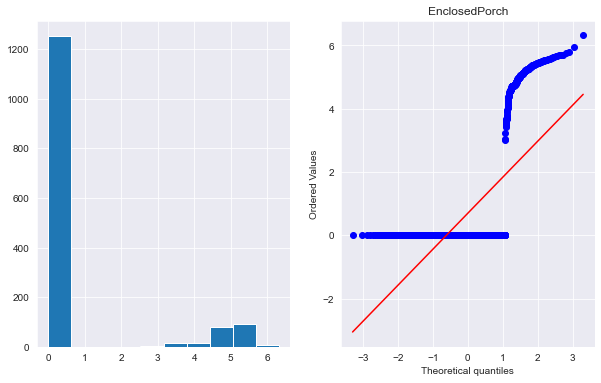

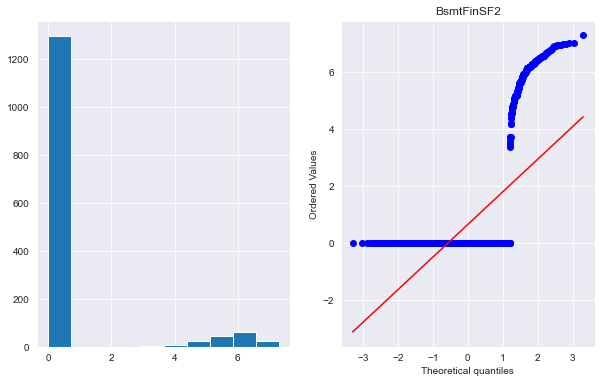

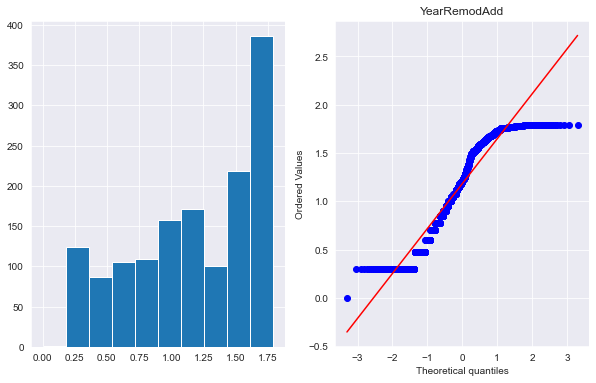

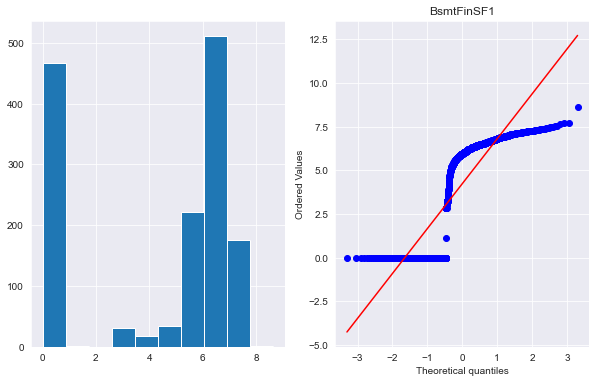

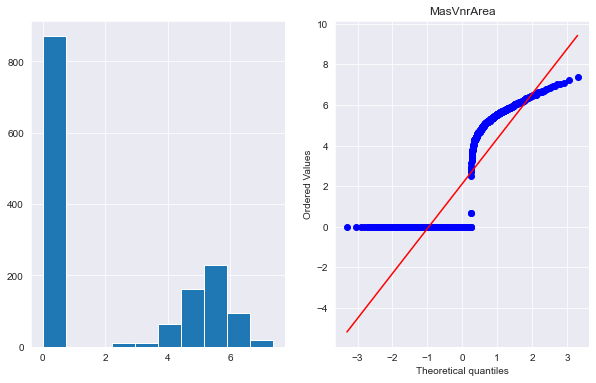

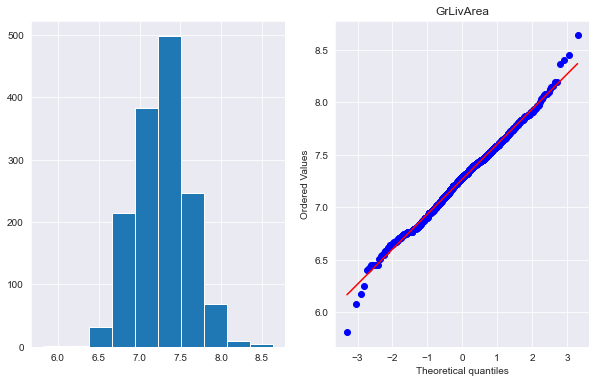

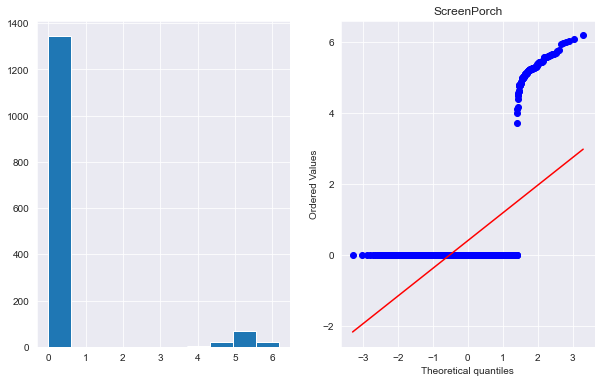

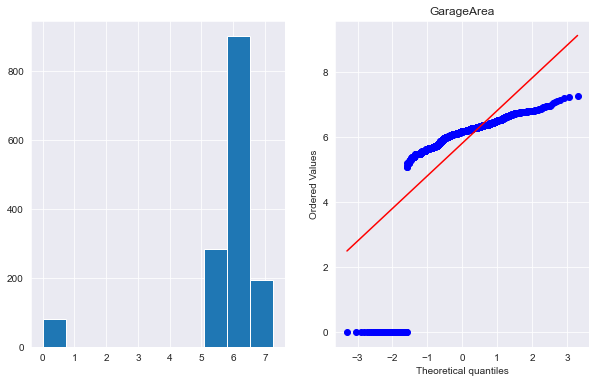

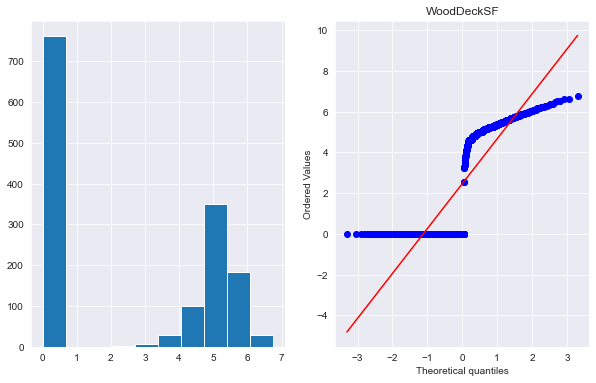

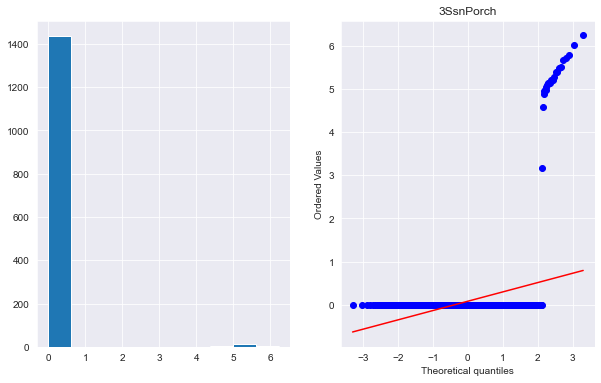

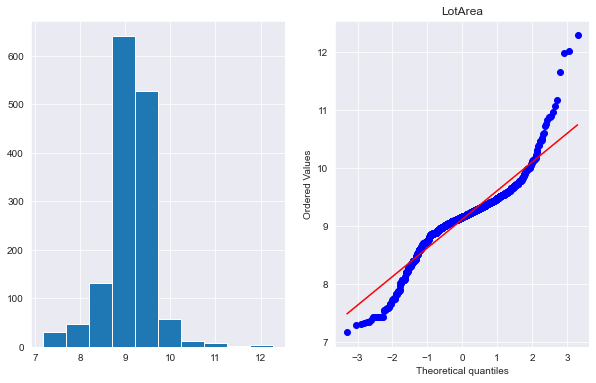

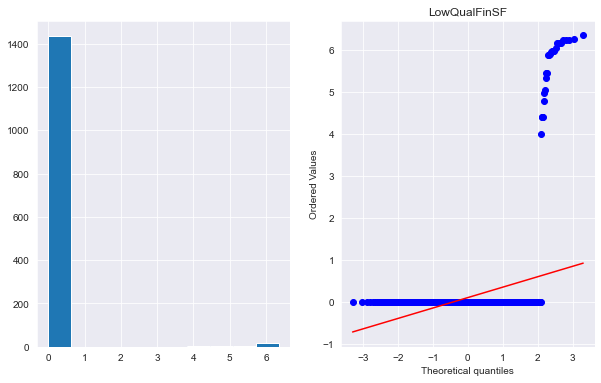

In [1647]:
for feature in cont_num_features:
    plot_figure(df_temp, feature)

## Exponential Transformation

In [1648]:
df_temp2 = df.copy()

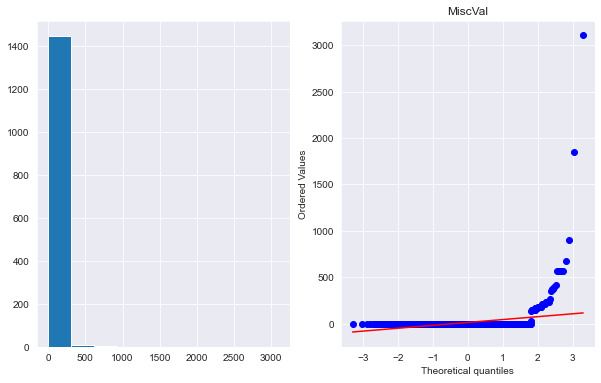

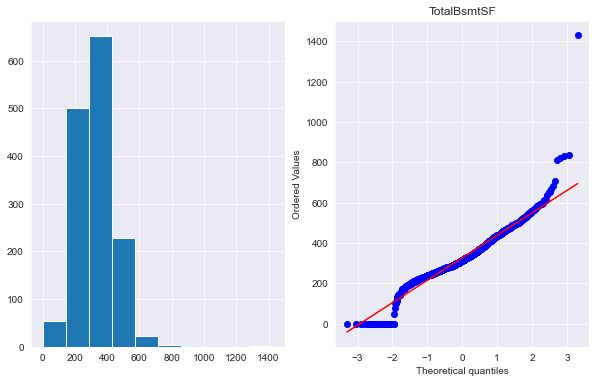

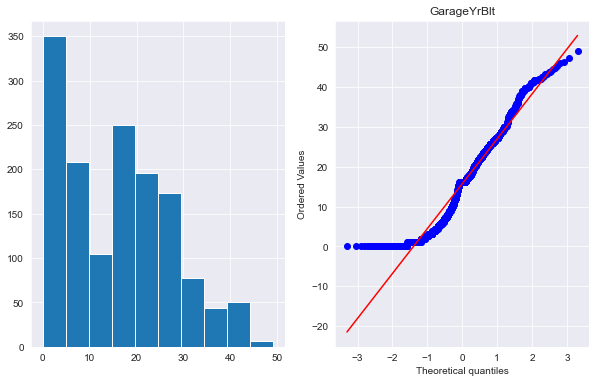

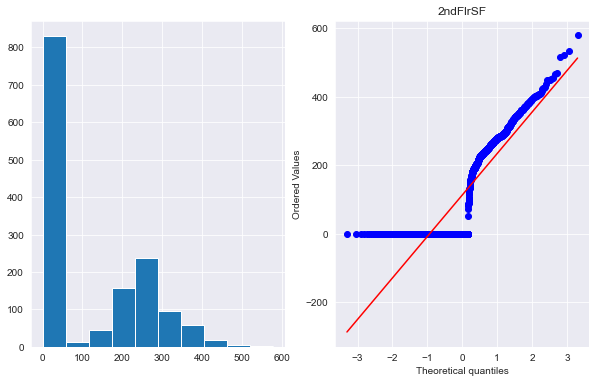

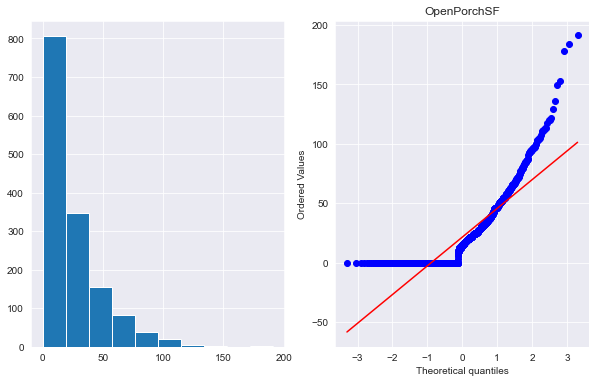

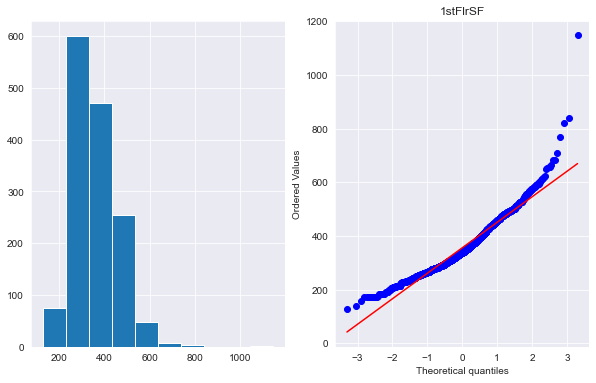

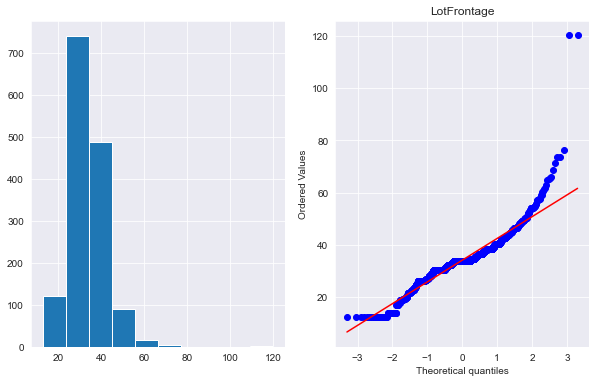

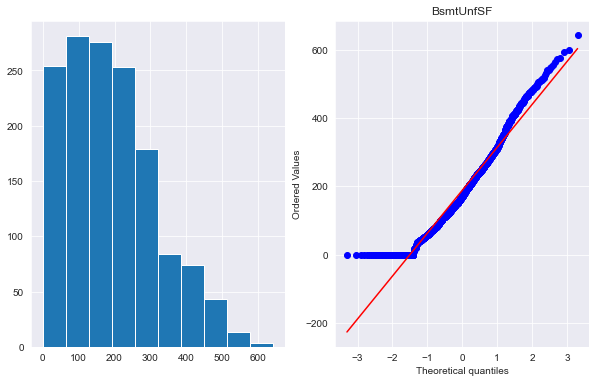

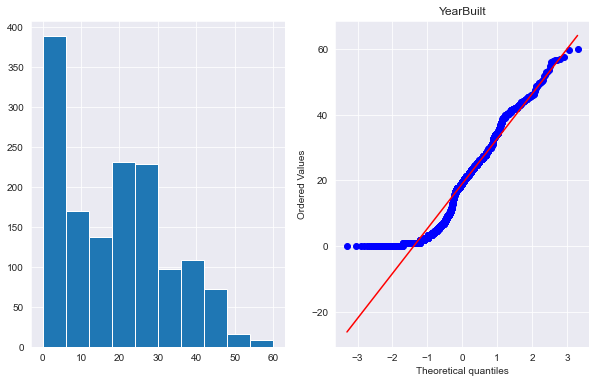

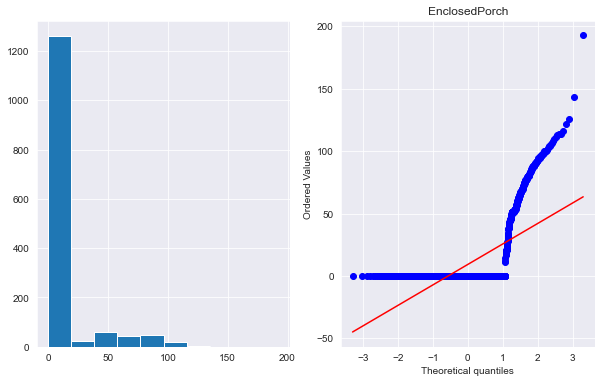

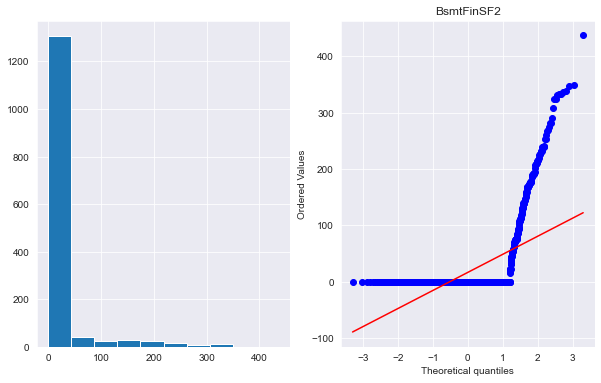

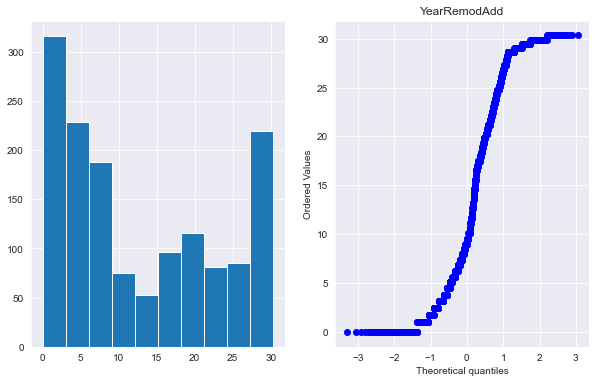

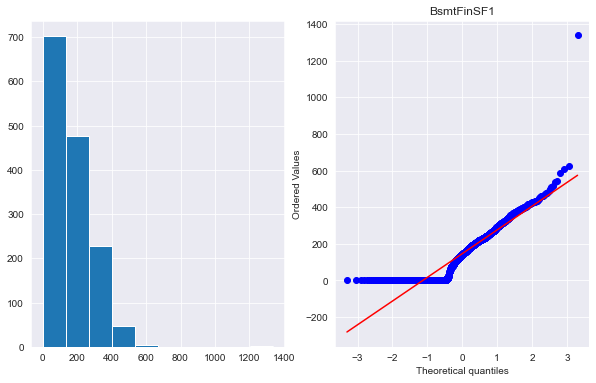

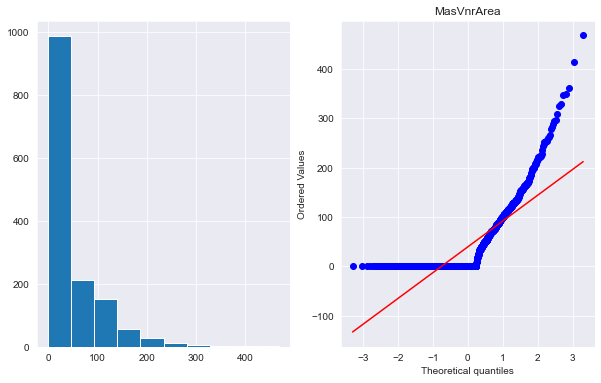

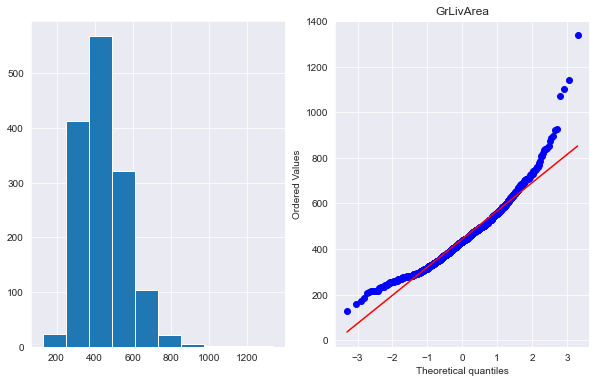

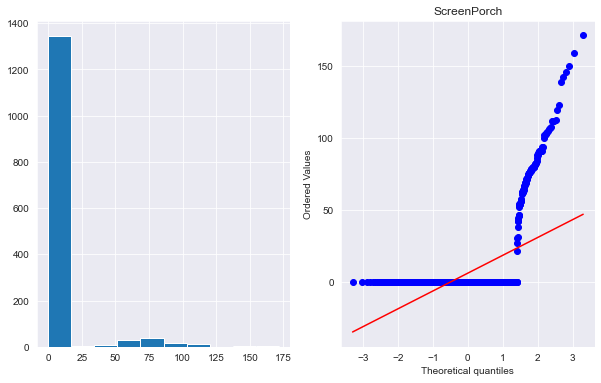

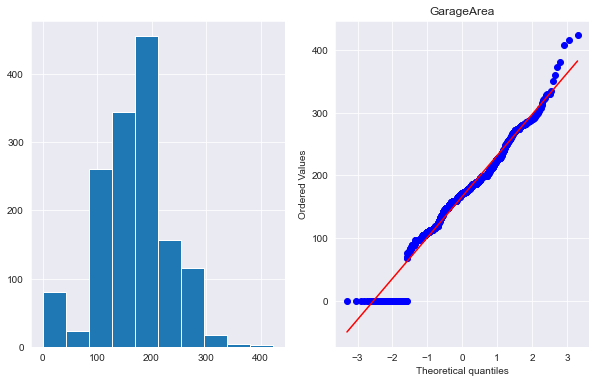

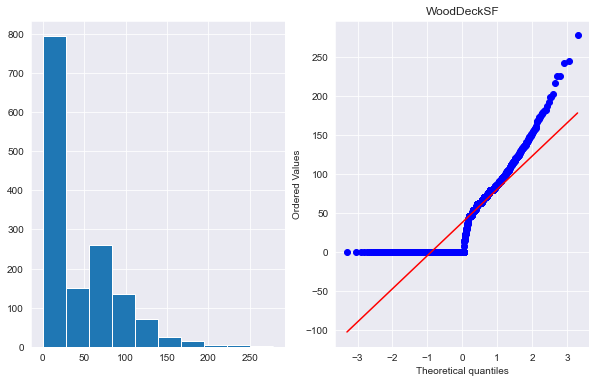

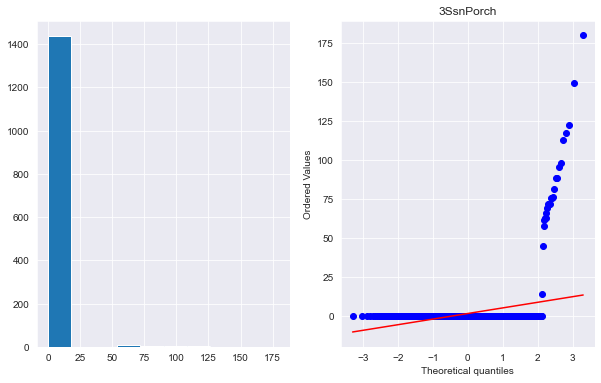

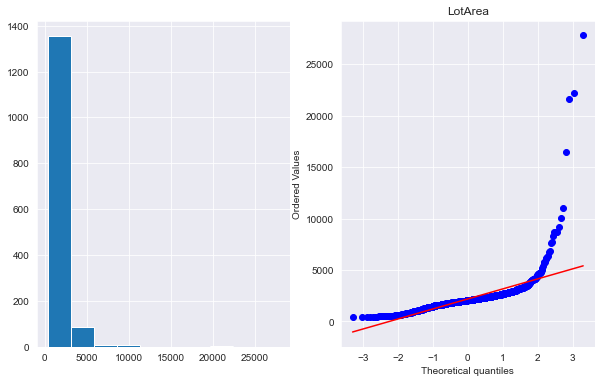

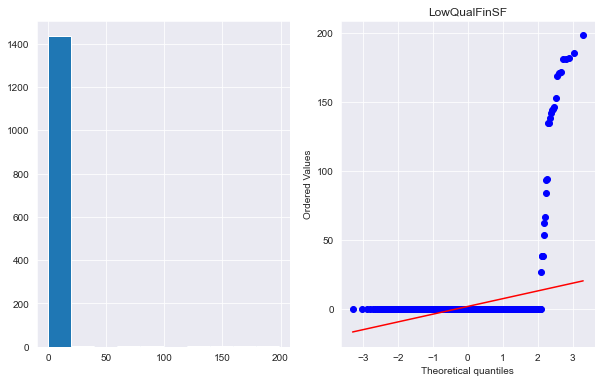

In [1649]:
for feature in cont_num_features:
    exp = 1.2  #can experiemnt with the exponent value
    df_temp2[feature] = df_temp2[feature]**(1/exp)
    plot_figure(df_temp2, feature)

Log Transform gives sufficiently good results. Does this have to be applied on test data also?

In [1650]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,GarageYrBlt_nan_present,LotFrontage_nan_present,MasVnrArea_nan_present
0,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,WD,Normal,0,0,0
1,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,WD,Normal,0,0,0
2,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,WD,Normal,0,0,0
3,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,WD,Abnorml,0,0,0
4,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,WD,Normal,0,0,0


In [1651]:
df_temp.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,GarageYrBlt_nan_present,LotFrontage_nan_present,MasVnrArea_nan_present
0,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,1.791759,0.845098,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.283204,Gd,TA,PConc,Gd,TA,No,GLQ,6.561031,Unf,0.0,5.017280,6.753438,GasA,Ex,Y,SBrkr,6.752270,6.751101,0.0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,1.791759,RFn,2,6.308098,TA,TA,Y,0.000000,4.127134,0.000000,0.0,0.0,0,Missing,Missing,Missing,0.0,2,WD,Normal,0,0,0
1,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,3.465736,1.518514,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,6.886532,Unf,0.0,5.652489,7.141245,GasA,Ex,Y,SBrkr,7.140453,0.000000,0.0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,3.465736,RFn,2,6.133398,TA,TA,Y,5.700444,0.000000,0.000000,0.0,0.0,0,Missing,Missing,Missing,0.0,5,WD,Normal,0,0,0
2,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2.079442,0.903090,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.093750,Gd,TA,PConc,Gd,TA,Mn,GLQ,6.188264,Unf,0.0,6.075346,6.825460,GasA,Ex,Y,SBrkr,6.824374,6.765039,0.0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2.079442,RFn,2,6.411818,TA,TA,Y,0.000000,3.761200,0.000000,0.0,0.0,0,Missing,Missing,Missing,0.0,9,WD,Normal,0,0,0
3,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,4.521789,1.579784,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,5.379897,Unf,0.0,6.293419,6.629363,GasA,Gd,Y,SBrkr,6.867974,6.629363,0.0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,2.197225,Unf,3,6.466145,TA,TA,Y,0.000000,3.583519,5.609472,0.0,0.0,0,Missing,Missing,Missing,0.0,2,WD,Abnorml,0,0,0
4,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2.197225,1.000000,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.860786,Gd,TA,PConc,Gd,TA,Av,GLQ,6.486161,Unf,0.0,6.196444,7.044033,GasA,Ex,Y,SBrkr,7.043160,6.960348,0.0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2.197225,RFn,3,6.729824,TA,TA,Y,5.262690,4.442651,0.000000,0.0,0.0,0,Missing,Missing,Missing,0.0,12,WD,Normal,0,0,0


In [1652]:
df = df_temp  # reassigning the log transformed dataframe to df variable

# ------------------------------------------------------------------------------------------------------------

# 3.) Outlier Removal

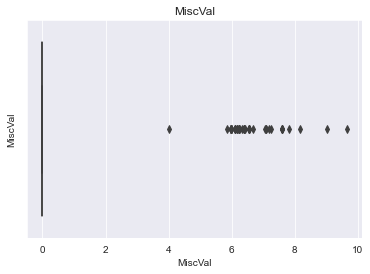

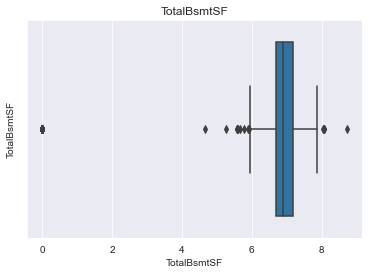

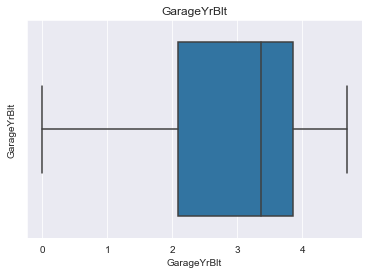

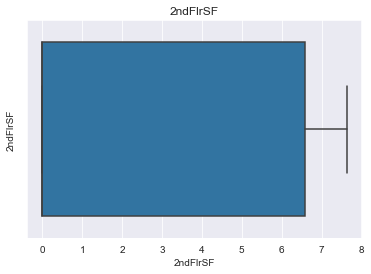

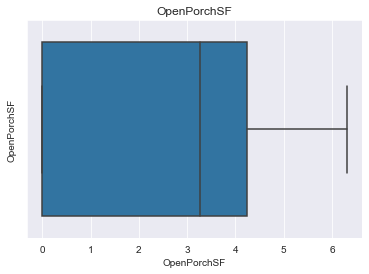

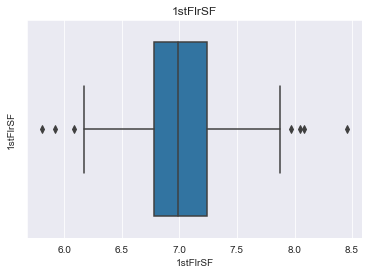

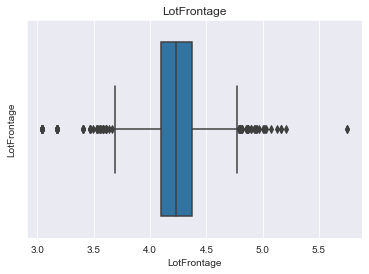

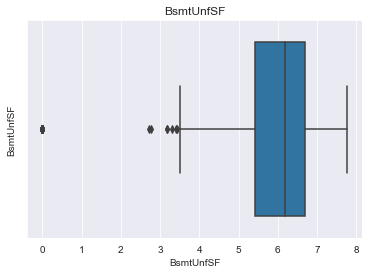

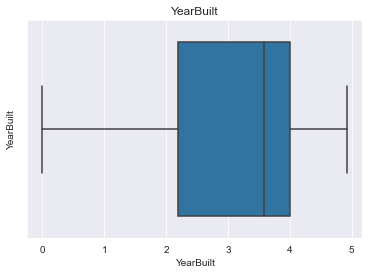

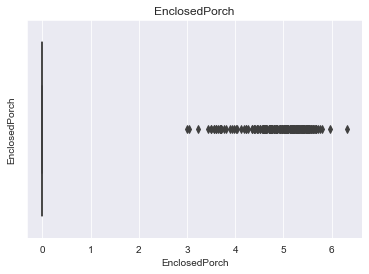

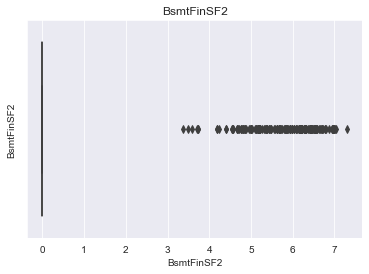

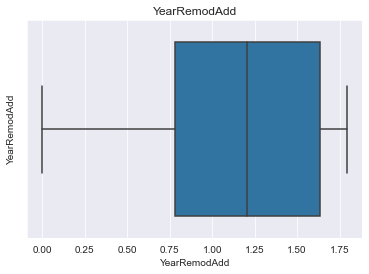

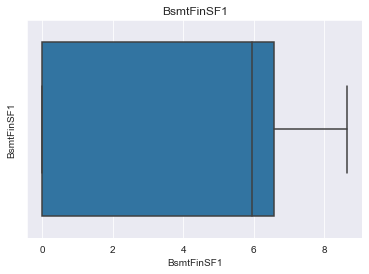

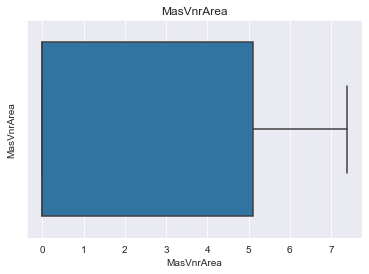

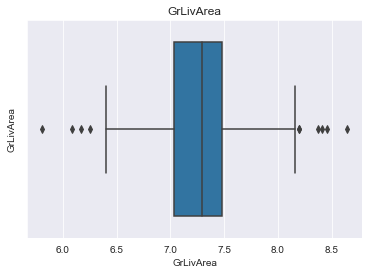

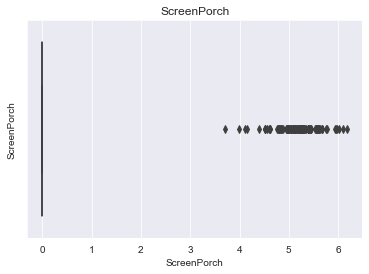

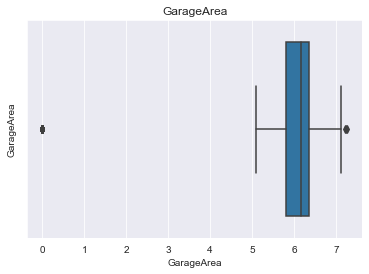

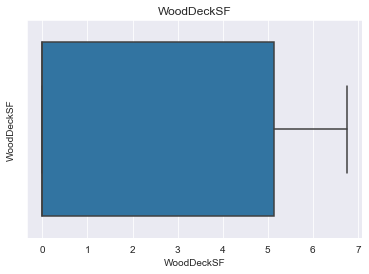

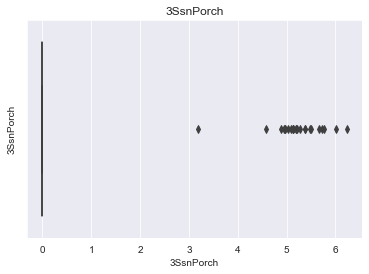

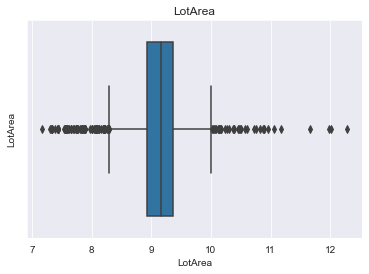

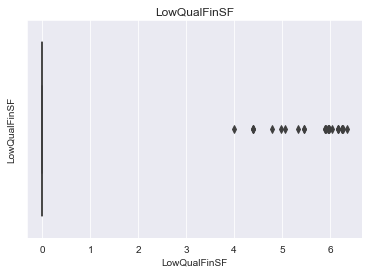

In [1653]:
for feature in cont_num_features:
    data = df.copy()
    sns.set_style('darkgrid')
    sns.boxplot(x = df[feature])
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [1654]:
df.shape

(1460, 81)

We will do outlier removal only on variables for which we can see a clear box plot with outliers and not just a constant space line like 'MiscVal'. Variables to consider for outlier removal = ['TotalBsmtSF','1stFlrSF','LotFrontage','BsmtUnfSF','GrLivArea','LotArea']

In [1655]:
temp = df.copy()
temp.shape

(1460, 81)

In [1656]:
temp['SalePrice'] = train['SalePrice'] #we will need the output variable for encoding step so we get it back here before dropping outliers

In [1657]:
for var in ['TotalBsmtSF','1stFlrSF','LotFrontage','BsmtUnfSF','GrLivArea','LotArea']:
    IQR = temp[var].quantile(0.75) - temp[var].quantile(0.25)  #inter-quartile range i.e. difference between 75th and 25th percentile
    lower_bridge = temp[var].quantile(0.25) - (IQR*2)  # the 2 value is experimented with between 1.5-3 so as to ensure we are not dropping too many records as is happening with 1.5 and still being able to remove sufiicient outlier trend which is not happening with 3
    upper_bridge = temp[var].quantile(0.75) + (IQR*2)
    temp = temp[(temp[var]>lower_bridge) & (temp[var]<upper_bridge)]


In [1658]:
temp.shape

(1213, 82)

We will check whether the outliers are reduced for our choosen IQR multiplier or not

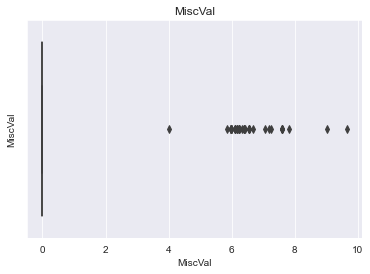

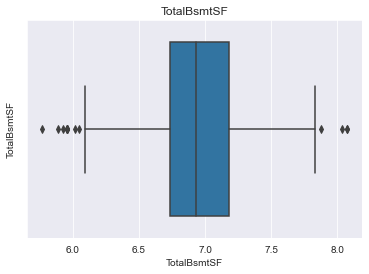

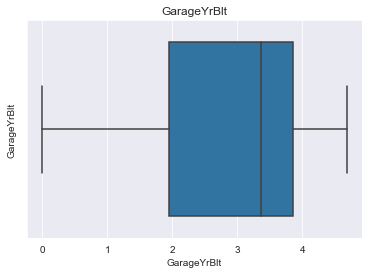

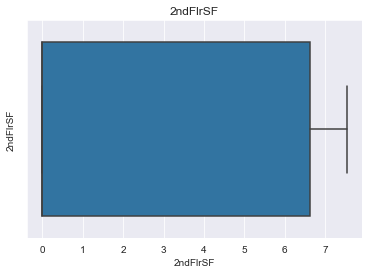

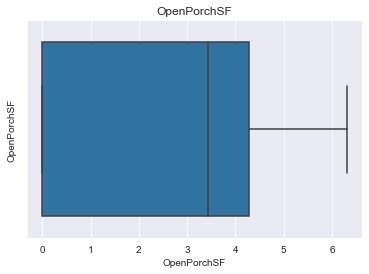

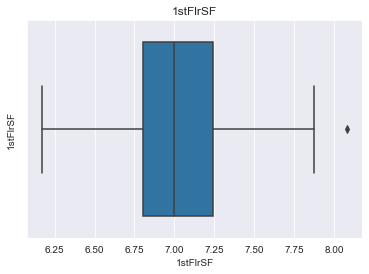

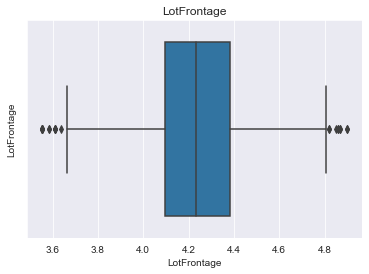

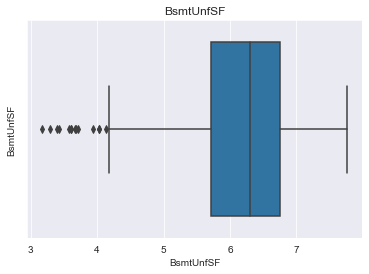

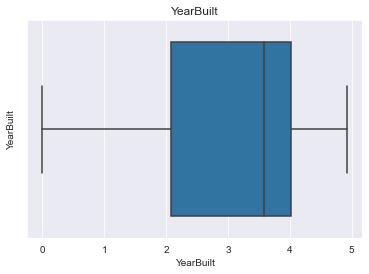

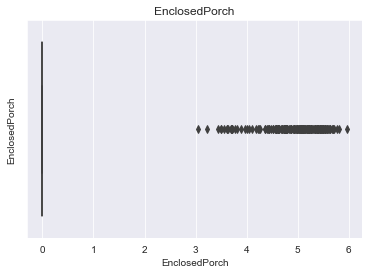

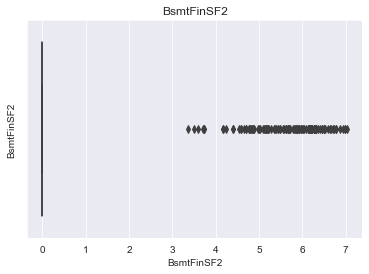

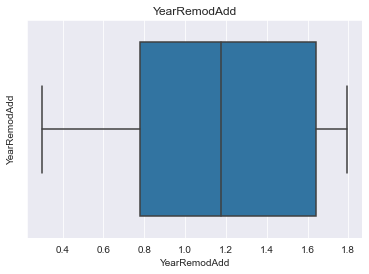

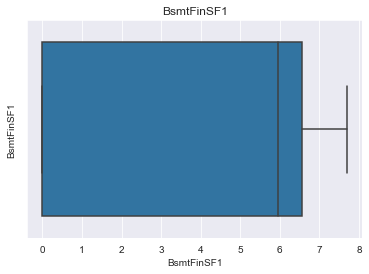

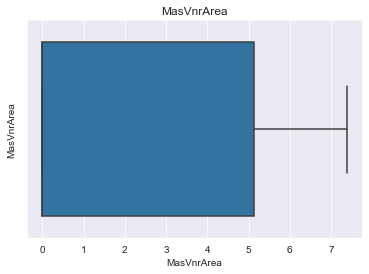

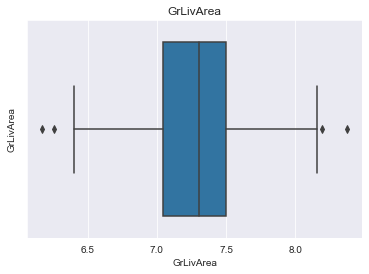

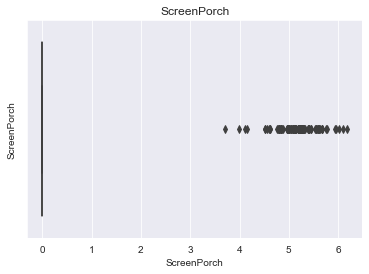

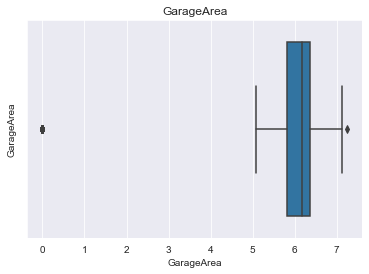

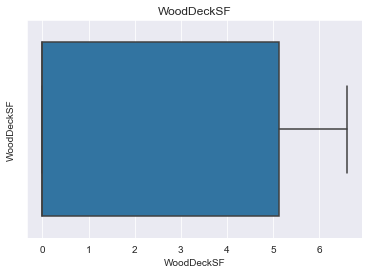

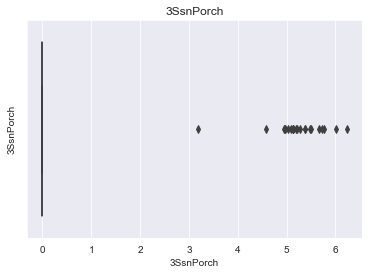

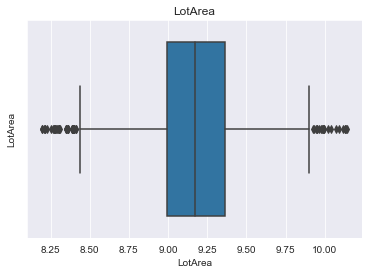

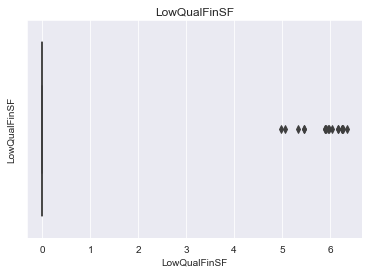

In [1659]:
for feature in cont_num_features:
    data = temp.copy()
    sns.set_style('darkgrid')
    sns.boxplot(x = data[feature])
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

Assigning the outlier removed dataset to our original df variable. The same outlier removal should NOT be done on the test data intuitively right?

In [1660]:
df = temp

# --------------------------------------------------------------------------------------------------------------

# 4.) Encoding Non-numerical Categorical Variables
Numerical categorical variables do not need to be encoded as they can be easily interpreted by the model

## Step 1.) Handling Rare Categorical Variables

https://medium.com/gett-engineering/handling-rare-categorical-values-in-pandas-d1e3f17475f0

If we encode all categories of all categorical variables then we will get a huge feature space so we have two options:

1.) We can mark any category which has data points < 1% of total dataframe rows as a new category 'Rare' and thereby reducing their statistical significance and reducing our feature complexity on encoding

2.) Uss KDD Orange Cup challenge method where from catgeorical variables which have huge number of categories we take only the top 15/20 most frequent categrories and others are represented as all 0 vectors

Can use 1+2 also. If 1 does the trick then fine but 2 is a very prominent method of dealing with this problem

In [1661]:
categorical_features = [col for col in df.columns if df[col].dtypes=='O']

In [1662]:
num_classes = {}

for feature in categorical_features:
    num_classes[feature] = len(df[feature].unique())
    
temp = pd.DataFrame(list(num_classes.items()))
temp.columns = ['Feature','Number of features']
temp
    

,Feature,Number of features
0,MSZoning,5
1,Street,2
2,Alley,3
3,LotShape,4
4,LandContour,4
5,Utilities,2
6,LotConfig,5
7,LandSlope,3
8,Neighborhood,23
9,Condition1,9


In [1663]:
sum(temp['Number of features'])  # if we one-hot encode all then we will roughly add 257-42 = 215 additional columns

246

Implementing Option 1

In [1664]:
for feature in categorical_features:
    freq = df[feature].value_counts(normalize=True)
    mapping = df[feature].map(freq)
    df[feature] = df[feature].mask(mapping<0.01, 'Rare_var')

In [1665]:
num_classes = {}

for feature in categorical_features:
    num_classes[feature] = len(df[feature].unique())
    
temp = pd.DataFrame(list(num_classes.items()))
temp.columns = ['Feature','Number of features']
temp

,Feature,Number of features
0,MSZoning,4
1,Street,2
2,Alley,3
3,LotShape,4
4,LandContour,4
5,Utilities,2
6,LotConfig,5
7,LandSlope,3
8,Neighborhood,20
9,Condition1,6


In [1666]:
sum(temp['Number of features'])  # we were able to eliminate 54 statistically insiginificant categories

198

In [1667]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,GarageYrBlt_nan_present,LotFrontage_nan_present,MasVnrArea_nan_present,SalePrice
0,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,1.791759,0.845098,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.283204,Gd,TA,PConc,Gd,TA,No,GLQ,6.561031,Unf,0.0,5.017280,6.753438,GasA,Ex,Y,SBrkr,6.752270,6.751101,0.0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,1.791759,RFn,2,6.308098,TA,TA,Y,0.000000,4.127134,0.000000,0.0,0.0,0,Missing,Missing,Missing,0.0,2,WD,Normal,0,0,0,208500
1,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Rare_var,Feedr,Norm,1Fam,1Story,6,8,3.465736,1.518514,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,6.886532,Unf,0.0,5.652489,7.141245,GasA,Ex,Y,SBrkr,7.140453,0.000000,0.0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,3.465736,RFn,2,6.133398,TA,TA,Y,5.700444,0.000000,0.000000,0.0,0.0,0,Missing,Missing,Missing,0.0,5,WD,Normal,0,0,0,181500
2,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2.079442,0.903090,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.093750,Gd,TA,PConc,Gd,TA,Mn,GLQ,6.188264,Unf,0.0,6.075346,6.825460,GasA,Ex,Y,SBrkr,6.824374,6.765039,0.0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2.079442,RFn,2,6.411818,TA,TA,Y,0.000000,3.761200,0.000000,0.0,0.0,0,Missing,Missing,Missing,0.0,9,WD,Normal,0,0,0,223500
3,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,4.521789,1.579784,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,5.379897,Unf,0.0,6.293419,6.629363,GasA,Gd,Y,SBrkr,6.867974,6.629363,0.0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,2.197225,Unf,3,6.466145,TA,TA,Y,0.000000,3.583519,5.609472,0.0,0.0,0,Missing,Missing,Missing,0.0,2,WD,Abnorml,0,0,0,140000
4,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2.197225,1.000000,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.860786,Gd,TA,PConc,Gd,TA,Av,GLQ,6.486161,Unf,0.0,6.196444,7.044033,GasA,Ex,Y,SBrkr,7.043160,6.960348,0.0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2.197225,RFn,3,6.729824,TA,TA,Y,5.262690,4.442651,0.000000,0.0,0.0,0,Missing,Missing,Missing,0.0,12,WD,Normal,0,0,0,250000


## Step 2.) Actual Encoding of the Data

As seen above if we do one hot encoding we will increase the already 81 feature space by an additional 150+ variables which is not efficient. We could ideally use KDD cup challenge to retain only top 5 categories but still considerably large number of features will be added. so instead of one-hot encoding we will use Target Guided Ordinal Encoding because logically deriving the ranks for each category will be very difficult and hence, cant use Ordinal Encoding.

In [1668]:
df[categorical_features]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Missing,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
1,RL,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Rare_var,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
2,RL,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
3,RL,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,Missing,Missing,Missing,WD,Abnorml
4,RL,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,FV,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Missing,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
1455,RL,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
1456,RL,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,Missing,MnPrv,Missing,WD,Normal
1457,RL,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Rare_var,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,Missing,GdPrv,Shed,WD,Normal


In [1669]:
feature_label_mapping = {}   # dictionary which holds the rank mapping for each categorical variable i.e. our transformer which will be used to transform/encode our test/future data in the form {Name:{a1:4,a3:3...ax:0},Pet:{Dog:3,..xyz:0}} 
df_copy = df.copy() #we need a pre-encoded version of the train dataframe as needed during the encoding of test data.
for feature in categorical_features:
    labels_ordered=df.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}   #the labels ordered is dictionary which holds the ranking mapping of categories for each categorical feature
    feature_label_mapping[feature] = labels_ordered   #store the rank mapping for each feature in this dictionary
    df[feature]=df[feature].map(labels_ordered)   #implement the ranking mapping on the feature


In [1670]:
df.head(50)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,GarageYrBlt_nan_present,LotFrontage_nan_present,MasVnrArea_nan_present,SalePrice
0,60,2,4.174387,9.041922,1,2,0,1,1,2,1,12,4,1,2,6,7,5,1.791759,0.845098,0,0,9,9,2,5.283204,2,3,3,2,2,0,5,6.561031,3,0.000000,5.017280,6.753438,2,4,1,3,6.752270,6.751101,0.000000,7.444249,1,0,2,1,3,1,2,8,3,0,1,3,1.791759,1,2,6.308098,2,2,2,0.000000,4.127134,0.000000,0.000000,0.000000,0,0,4,2,0.000000,2,2,3,0,0,0,208500
1,20,2,4.382027,9.169518,1,2,0,1,1,1,1,8,1,1,2,4,6,8,3.465736,1.518514,0,0,3,2,1,0.000000,1,3,1,2,2,3,3,6.886532,3,0.000000,5.652489,7.141245,2,4,1,3,7.140453,0.000000,0.000000,7.140453,0,1,2,0,3,1,1,6,3,1,3,3,3.465736,1,2,6.133398,2,2,2,5.700444,0.000000,0.000000,0.000000,0.000000,0,0,4,2,0.000000,5,2,3,0,0,0,181500
2,60,2,4.219508,9.328123,1,2,2,1,1,2,1,12,4,1,2,6,7,5,2.079442,0.903090,0,0,9,9,2,5.093750,2,3,3,2,2,1,5,6.188264,3,0.000000,6.075346,6.825460,2,4,1,3,6.824374,6.765039,0.000000,7.487734,1,0,2,1,3,1,2,6,3,1,3,3,2.079442,1,2,6.411818,2,2,2,0.000000,3.761200,0.000000,0.000000,0.000000,0,0,4,2,0.000000,9,2,3,0,0,0,223500
3,70,2,4.094345,9.164296,1,2,2,1,1,0,1,14,4,1,2,6,7,5,4.521789,1.579784,0,0,2,3,1,0.000000,1,3,0,1,3,0,3,5.379897,3,0.000000,6.293419,6.629363,2,3,1,3,6.867974,6.629363,0.000000,7.448334,1,0,1,0,3,1,2,7,3,1,4,1,2.197225,0,3,6.466145,2,2,2,0.000000,3.583519,5.609472,0.000000,0.000000,0,0,4,2,0.000000,2,2,0,0,0,0,140000
4,60,2,4.430817,9.565214,1,2,2,1,1,1,1,18,4,1,2,6,8,5,2.197225,1.000000,0,0,9,9,2,5.860786,2,3,3,2,2,2,5,6.486161,3,0.000000,6.196444,7.044033,2,4,1,3,7.043160,6.960348,0.000000,7.695303,1,0,2,1,4,1,2,9,3,1,3,3,2.197225,1,3,6.729824,2,2,2,5.262690,4.442651,0.000000,0.000000,0.000000,0,0,4,2,0.000000,12,2,3,0,0,0,250000
5,50,2,4.442651,9.554993,1,2,2,1,1,2,1,7,4,1,2,1,5,5,2.833213,1.204120,0,0,9,9,1,0.000000,1,3,2,2,2,0,5,6.597146,3,0.000000,4.174387,6.680855,2,4,1,3,6.679599,6.340359,0.000000,7.216709,1,0,1,1,1,1,1,5,3,0,1,3,2.833213,0,2,6.175867,2,2,2,3.713572,3.433987,0.000000,5.771441,0.000000,0,0,2,0,6.552508,10,2,3,0,0,0,143000
6,20,2,4.317488,9.218705,1,2,0,1,1,2,1,16,4,1,2,4,8,5,1.386294,0.602060,0,0,9,9,3,5.231109,2,3,3,3,2,2,5,7.222566,3,0.000000,5.762051,7.430707,2,4,1,3,7.434848,0.000000,0.000000,7.434848,1,0,2,0,3,1,2,7,3,1,4,3,1.386294,1,2,6.456770,2,2,2,5.545177,4.060443,0.000000,0.000000,0.000000,0,0,4,2,0.000000,8,2,3,0,0,0,307000
7,60,2,4.234107,9.247829,1,2,2,1,1,0,1,9,5,1,2,6,7,6,3.610918,1.579784,0,0,5,6,3,5.484797,1,3,1,2,2,1,3,6.756932,0,3.496508,5.379897,7.010312,2,4,1,3,7.009409,6.891626,0.000000,7.644919,1,0,2,1,3,1,1,7,3,2,3,3,3.610918,1,2,6.184149,2,2,2,5.463832,5.323010,5.433722,0.000000,0.000000,0,0,4,0,5.860786,11,2,3,0,1,0,200000
8,50,1,3.931826,8.719317,1,2,0,1,1,2,1,3,0,1,2,1,7,5,4.356709,1.778151,0,0,8,3,1,0.000000,1,3,0,1,2,0,4,0.000000,3,0.000000,6.859615,6.859615,2,3,1,1,6.929517,6.624065,0.000000,7.480992,0,0,2,0,2,2,1,8,2,2,3,1,4.356709,0,2,6.150603,0,2,2,4.510860,0.000000,5.327876,0.000000,0.000000,0,0,4,2,0.000000,4,2,0,0,0,0,129900
9,190,2,3.912023,8.911934,1,2,0,1,1,0,1,2,0,0,0,0,5,6,4.248495,1.778151,0,0,3,2,1,0.000000,1,3,0,1,2,0,5,6.747587,3,0.000000,4.948760,6.899723,2,4,1,3,6.981935,0.000000,0.000000,6.981935,1,0,1,0,2,2,1,5,3

In [1671]:
labels_ordered

{'Abnorml': 0, 'Family': 1, 'Rare_var': 2, 'Normal': 3, 'Partial': 4}

Implementing the encoding on the test data

In [1672]:
# add a "New":-1 entry to each feature's ranking mapping dictionary to account for any new category that may appear in the test/any future data
for var in feature_label_mapping.keys():
    feature_label_mapping[var]['New'] = -1


In [1673]:
def target_ordinal_encoding(d2):  #feature_label_mapping variable should be accessable to this function as it is the transformer to be used.
    
    for feature in categorical_features:
        d2[feature] = np.where(d2[feature].isin(list(df_copy[feature].unique())),d2[feature],'New') # we need the pre-encoded values from d1(train) dataframe so createa  copy of the train dataframe before doing it's encoding. This line will mark any new categories in the d2(test/future data) dataframe as "New"
        d2[feature]=d2[feature].map(feature_label_mapping[feature])  # now that we have converted any new feature not present in the train data to "New" we can use our train data's ranking mapping dictionary on our test data
    return d2  #returns the encoded test/future dataframe based on mappings computed from the train data as we require


In [1674]:
target_ordinal_encoding(df_test)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,GarageYrBlt_nan_present,LotFrontage_nan_present,MasVnrArea_nan_present
0,20,-1,80.0,11622,1,2,0,1,1,2,1,6,1,1,2,4,5,6,49,49,0,0,9,9,1,0.0,1,3,1,1,2,0,0,468.0,2,144.0,270.0,882.0,2,2,1,3,896,0,0,896,0.0,0.0,1,0,2,1,1,5,3,0,1,3,49.0,0,1.0,730.0,2,2,2,140,0,0,0,120,0,0,2,2,0,6,2,3,0,0,0
1,20,2,81.0,14267,1,2,2,1,1,0,1,6,4,1,2,4,6,6,52,52,2,0,2,1,2,108.0,1,3,1,1,2,0,3,923.0,3,0.0,406.0,1329.0,2,2,1,3,1329,0,0,1329,0.0,0.0,1,1,3,1,2,6,3,0,1,3,52.0,0,1.0,312.0,2,2,2,393,36,0,0,0,0,0,4,-1,12500,6,2,3,0,0,0
2,60,2,74.0,13830,1,2,2,1,1,2,1,11,4,1,2,6,5,5,13,12,0,0,9,9,1,0.0,1,3,3,2,2,0,5,791.0,3,0.0,137.0,928.0,2,3,1,3,928,701,0,1629,0.0,0.0,2,1,3,1,1,6,3,1,3,3,13.0,2,2.0,482.0,2,2,2,212,34,0,0,0,0,0,2,2,0,3,2,3,0,0,0
3,60,2,78.0,9978,1,2,2,1,1,2,1,11,4,1,2,6,6,6,12,12,0,0,9,9,2,20.0,1,3,3,1,2,0,5,602.0,3,0.0,324.0,926.0,2,4,1,3,926,678,0,1604,0.0,0.0,2,1,3,1,2,7,3,1,4,3,12.0,2,2.0,470.0,2,2,2,360,36,0,0,0,0,0,4,2,0,6,2,3,0,0,0
4,120,2,43.0,5005,1,2,2,3,1,2,1,17,4,1,3,4,8,5,18,18,0,0,5,6,1,0.0,2,3,3,2,2,0,3,263.0,3,0.0,1017.0,1280.0,2,4,1,3,1280,0,0,1280,0.0,0.0,2,0,2,1,2,5,3,0,1,3,18.0,1,2.0,506.0,2,2,2,0,82,0,0,144,0,0,4,2,0,1,2,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,1,21.0,1936,1,2,0,1,1,2,1,-1,4,1,-1,6,4,7,36,36,0,0,10,10,1,0.0,1,3,1,1,2,0,4,0.0,3,0.0,546.0,546.0,2,3,1,3,546,546,0,1092,0.0,0.0,1,1,3,1,1,5,3,0,1,3,28.0,0,0.0,0.0,2,2,2,0,0,0,0,0,0,0,4,2,0,6,2,3,1,0,0
1455,160,1,21.0,1894,1,2,0,1,1,2,1,-1,4,1,3,6,4,5,36,36,0,0,10,10,1,0.0,1,3,1,1,2,0,0,252.0,3,0.0,294.0,546.0,2,2,1,3,546,546,0,1092,0.0,0.0,1,1,3,1,1,6,3,0,1,-1,36.0,0,1.0,286.0,2,2,2,0,24,0,0,0,0,0,4,2,0,4,2,0,0,0,0
1456,20,2,160.0,20000,1,2,0,1,1,2,1,7,4,1,2,4,5,7,46,10,0,0,9,9,1,0.0,1,3,1,1,2,0,3,1224.0,3,0.0,0.0,1224.0,2,4,1,3,1224,0,0,1224,1.0,0.0,1,0,4,1,1,7,3,1,3,1,46.0,0,2.0,576.0,2,2,2,474,0,0,0,0,0,0,4,2,0,9,2,0,0,0,0
1457,85,2,62.0,10441,1,2,0,1,1,2,1,7,4,1,2,2,5,5,14,14,0,0,5,3,1,0.0,1,3,3,2,2,2,5,337.0,3,0.0,575.0,912.0,2,2,1,3,970,0,0,970,0.0,1.0,1,0,3,1,1,6,3,0,1,3,28.0,0,0.0,0.0,2,2,2,80,32,0,0,0,0,0,2,0,700,7,2,3,1,0,0


In [1675]:
feature_label_mapping

{'MSZoning': {'Rare_var': 0, 'RM': 1, 'RL': 2, 'FV': 3, 'New': -1},
 'Street': {'Rare_var': 0, 'Pave': 1, 'New': -1},
 'Alley': {'Grvl': 0, 'Pave': 1, 'Missing': 2, 'New': -1},
 'LotShape': {'Reg': 0, 'Rare_var': 1, 'IR1': 2, 'IR2': 3, 'New': -1},
 'LandContour': {'Bnk': 0, 'Lvl': 1, 'Low': 2, 'HLS': 3, 'New': -1},
 'Utilities': {'Rare_var': 0, 'AllPub': 1, 'New': -1},
 'LotConfig': {'Corner': 0,
  'FR2': 1,
  'Inside': 2,
  'Rare_var': 3,
  'CulDSac': 4,
  'New': -1},
 'LandSlope': {'Rare_var': 0, 'Gtl': 1, 'Mod': 2, 'New': -1},
 'Neighborhood': {'IDOTRR': 0,
  'Edwards': 1,
  'BrkSide': 2,
  'OldTown': 3,
  'Sawyer': 4,
  'SWISU': 5,
  'NAmes': 6,
  'Mitchel': 7,
  'Rare_var': 8,
  'NWAmes': 9,
  'SawyerW': 10,
  'Gilbert': 11,
  'CollgCr': 12,
  'ClearCr': 13,
  'Crawfor': 14,
  'Timber': 15,
  'Somerst': 16,
  'StoneBr': 17,
  'NoRidge': 18,
  'NridgHt': 19,
  'New': -1},
 'Condition1': {'Artery': 0,
  'Feedr': 1,
  'Rare_var': 2,
  'RRAn': 3,
  'Norm': 4,
  'PosN': 5,
  'New': -1}

# ---------------------------------------------------------------------------------------------------------------

# 5.) Standardization and Normalization of the Data

We can use either StandardScaler or MinMaxScaler. Test with both and see which proves to be better. 

MinMaxScaler bounds range to [0,1]. It retains shape of original distribution so good if most variables are already normally distributed which is sort of true for our case. It is not very resiliant to outliers but since we have done outlier treatment it is fine.

StandardScaler will turn variable into a near gaussian distr with mean= 0 and variance =1 but with unbounded range. It is more resiliant to outliers.

In [1676]:
feature_scale=[feature for feature in df.columns if feature not in ['SalePrice']] # exclude the DEPENDANT VARIABLE from both train and test data while scaling

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_scaled = scaler.fit_transform(df[feature_scale])

In [1677]:
df = pd.concat([df['SalePrice'].reset_index(drop=True),
                    pd.DataFrame(df_scaled, columns=feature_scale)],
                    axis=1)
df.head()

,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,GarageYrBlt_nan_present,LotFrontage_nan_present,MasVnrArea_nan_present
0,208500,0.235294,0.666667,0.461112,0.434435,1.0,1.0,0.000000,0.333333,1.0,0.50,0.5,0.631579,0.8,1.0,0.666667,1.000000,0.666667,0.500,0.364180,0.364813,0.0,0.0,0.9,0.9,0.666667,0.716038,0.666667,1.0,1.000000,0.666667,0.666667,0.000000,1.0,0.853057,0.6,0.0,0.401703,0.427425,1.0,1.00,1.0,1.0,0.303534,0.895930,0.0,0.578456,0.5,0.0,0.666667,0.5,0.375,0.0,0.666667,0.454545,1.0,0.000000,0.2,0.75,0.382680,0.5,0.50,0.871552,0.666667,1.0,1.0,0.000000,0.654449,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.666667,0.75,0.0,0.0,0.0
1,181500,0.000000,0.666667,0.615779,0.500147,1.0,1.0,0.000000,0.333333,1.0,0.25,0.5,0.421053,0.2,1.0,0.666667,0.666667,0.555556,0.875,0.704421,0.816357,0.0,0.0,0.3,0.2,0.333333,0.000000,0.333333,1.0,0.333333,0.666667,0.666667,1.000000,0.6,0.895378,0.6,0.0,0.540439,0.595688,1.0,1.00,1.0,1.0,0.507215,0.000000,0.0,0.440135,0.0,0.5,0.666667,0.0,0.375,0.0,0.333333,0.272727,1.0,0.333333,0.6,0.75,0.740205,0.5,0.50,0.847414,0.666667,1.0,1.0,0.863365,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.363636,0.666667,0.75,0.0,0.0,0.0
2,223500,0.235294,0.666667,0.494722,0.581829,1.0,1.0,0.666667,0.333333,1.0,0.50,0.5,0.631579,0.8,1.0,0.666667,1.000000,0.666667,0.500,0.422652,0.403698,0.0,0.0,0.9,0.9,0.666667,0.690361,0.666667,1.0,1.000000,0.666667,0.666667,0.333333,1.0,0.804590,0.6,0.0,0.632794,0.458674,1.0,1.00,1.0,1.0,0.341367,0.897780,0.0,0.598256,0.5,0.0,0.666667,0.5,0.375,0.0,0.666667,0.272727,1.0,0.333333,0.6,0.75,0.444123,0.5,0.50,0.885882,0.666667,1.0,1.0,0.000000,0.596422,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.727273,0.666667,0.75,0.0,0.0,0.0
3,140000,0.294118,0.666667,0.401490,0.497458,1.0,1.0,0.666667,0.333333,1.0,0.00,0.5,0.736842,0.8,1.0,0.666667,1.000000,0.666667,0.500,0.919066,0.857440,0.0,0.0,0.2,0.3,0.333333,0.000000,0.333333,1.0,0.000000,0.333333,1.000000,0.000000,0.6,0.699487,0.6,0.0,0.680423,0.373591,1.0,0.75,1.0,1.0,0.364244,0.879775,0.0,0.580316,0.5,0.0,0.333333,0.0,0.375,0.0,0.666667,0.363636,1.0,0.333333,0.8,0.25,0.469279,0.0,0.75,0.893388,0.666667,1.0,1.0,0.000000,0.568247,0.941435,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.666667,0.00,0.0,0.0,0.0
4,250000,0.235294,0.666667,0.652122,0.703932,1.0,1.0,0.666667,0.333333,1.0,0.25,0.5,0.947368,0.8,1.0,0.666667,1.000000,0.777778,0.500,0.446592,0.468679,0.0,0.0,0.9,0.9,0.666667,0.794318,0.666667,1.0,1.000000,0.666667,0.666667,0.666667,1.0,0.843322,0.6,0.0,0.659243,0.553509,1.0,1.00,1.0,1.0,0.456165,0.923699,0.0,0.692764,0.5,0.0,0.666667,0.5,0.500,0.0,0.666667,0.545455,1.0,0.333333,0.6,0.75,0.469279,0.5,0.75,0.929819,0.666667,1.0,1.0,0.797065,0.704481,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.000000,0.666667,0.75,0.0,0.0,0.0


In [1678]:
df.head(50)

,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,GarageYrBlt_nan_present,LotFrontage_nan_present,MasVnrArea_nan_present
0,208500,0.235294,0.666667,0.461112,0.434435,1.0,1.0,0.000000,0.333333,1.0,0.50,0.5,0.631579,0.8,1.0,0.666667,1.000000,0.666667,0.500,0.364180,0.364813,0.0,0.0,0.9,0.9,0.666667,0.716038,0.666667,1.000000,1.000000,0.666667,0.666667,0.000000,1.0,0.853057,0.6,0.000000,0.401703,0.427425,1.0,1.00,1.0,1.000000,0.303534,0.895930,0.000000,0.578456,0.5,0.0,0.666667,0.5,0.375,0.0,0.666667,0.454545,1.000000,0.000000,0.2,0.75,0.382680,0.5,0.50,0.871552,0.666667,1.0,1.0,0.000000,0.654449,0.000000,0.000000,0.000000,0.0,0.0,1.00,1.0,0.000000,0.090909,0.666667,0.75,0.0,0.0,0.0
1,181500,0.000000,0.666667,0.615779,0.500147,1.0,1.0,0.000000,0.333333,1.0,0.25,0.5,0.421053,0.2,1.0,0.666667,0.666667,0.555556,0.875,0.704421,0.816357,0.0,0.0,0.3,0.2,0.333333,0.000000,0.333333,1.000000,0.333333,0.666667,0.666667,1.000000,0.6,0.895378,0.6,0.000000,0.540439,0.595688,1.0,1.00,1.0,1.000000,0.507215,0.000000,0.000000,0.440135,0.0,0.5,0.666667,0.0,0.375,0.0,0.333333,0.272727,1.000000,0.333333,0.6,0.75,0.740205,0.5,0.50,0.847414,0.666667,1.0,1.0,0.863365,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.00,1.0,0.000000,0.363636,0.666667,0.75,0.0,0.0,0.0
2,223500,0.235294,0.666667,0.494722,0.581829,1.0,1.0,0.666667,0.333333,1.0,0.50,0.5,0.631579,0.8,1.0,0.666667,1.000000,0.666667,0.500,0.422652,0.403698,0.0,0.0,0.9,0.9,0.666667,0.690361,0.666667,1.000000,1.000000,0.666667,0.666667,0.333333,1.0,0.804590,0.6,0.000000,0.632794,0.458674,1.0,1.00,1.0,1.000000,0.341367,0.897780,0.000000,0.598256,0.5,0.0,0.666667,0.5,0.375,0.0,0.666667,0.272727,1.000000,0.333333,0.6,0.75,0.444123,0.5,0.50,0.885882,0.666667,1.0,1.0,0.000000,0.596422,0.000000,0.000000,0.000000,0.0,0.0,1.00,1.0,0.000000,0.727273,0.666667,0.75,0.0,0.0,0.0
3,140000,0.294118,0.666667,0.401490,0.497458,1.0,1.0,0.666667,0.333333,1.0,0.00,0.5,0.736842,0.8,1.0,0.666667,1.000000,0.666667,0.500,0.919066,0.857440,0.0,0.0,0.2,0.3,0.333333,0.000000,0.333333,1.000000,0.000000,0.333333,1.000000,0.000000,0.6,0.699487,0.6,0.000000,0.680423,0.373591,1.0,0.75,1.0,1.000000,0.364244,0.879775,0.000000,0.580316,0.5,0.0,0.333333,0.0,0.375,0.0,0.666667,0.363636,1.000000,0.333333,0.8,0.25,0.469279,0.0,0.75,0.893388,0.666667,1.0,1.0,0.000000,0.568247,0.941435,0.000000,0.000000,0.0,0.0,1.00,1.0,0.000000,0.090909,0.666667,0.00,0.0,0.0,0.0
4,250000,0.235294,0.666667,0.652122,0.703932,1.0,1.0,0.666667,0.333333,1.0,0.25,0.5,0.947368,0.8,1.0,0.666667,1.000000,0.777778,0.500,0.446592,0.468679,0.0,0.0,0.9,0.9,0.666667,0.794318,0.666667,1.000000,1.000000,0.666667,0.666667,0.666667,1.0,0.843322,0.6,0.000000,0.659243,0.553509,1.0,1.00,1.0,1.000000,0.456165,0.923699,0.000000,0.692764,0.5,0.0,0.666667,0.5,0.500,0.0,0.666667,0.545455,1.000000,0.333333,0.6,0.75,0.469279,0.5,0.75,0.929819,0.666667,1.0,1.0,0.797065,0.704481,0.000000,0.000000,0.000000,0.0,0.0,1.00,1.0,0.000000,1.000000,0.666667,0.75,0.0,0.0,0.0
5,143000,0.176471,0.666667,0.660938,0.698668,1.0,1.0,0.666667,0.333333,1.0,0.50,0.5,0.368421,0.8,1.0,0.666667,0.166667,0.444444,0.500,0.575859,0.605547,0.0,0.0,0.9,0.9,0.333333,0.000000,0.333333,1.000000,0.666667,0.666667,0.666667,0.000000,1.0

Scaling the test data - The scaled test dataframe may have values beyonf the [0,1] range because we are using the trasnformer trained on the train data

In [1679]:
df_test_scaled = scaler.transform(df_test[feature_scale])  #exclude the dependant variable before scaling in other use cases
df_test_scaled = pd.DataFrame(df_test_scaled, columns=feature_scale)
df_test_scaled.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,GarageYrBlt_nan_present,LotFrontage_nan_present,MasVnrArea_nan_present
0,0.000000,-0.333333,56.942363,5981.144723,1.0,1.0,0.000000,0.333333,1.0,0.5,0.5,0.315789,0.2,1.0,0.666667,0.666667,0.444444,0.625,9.959388,32.654030,0.0,0.0,0.9,0.9,0.333333,0.000000,0.333333,1.0,0.333333,0.333333,0.666667,0.0,0.0,60.848761,0.4,20.488883,58.276269,380.181798,1.0,0.50,1.0,1.0,466.896478,0.000000,0.0,405.148174,0.0,0.0,0.333333,0.0,0.250,0.0,0.333333,0.181818,1.0,0.000000,0.2,0.75,10.465320,0.0,0.25,100.859681,0.666667,1.0,1.0,21.203807,0.000000,0.0,0.0,19.430469,0.0,0.0,0.5,1.0,0.000000,0.454545,0.666667,0.75,0.0,0.0,0.0
1,0.000000,0.666667,57.687247,7343.328122,1.0,1.0,0.666667,0.333333,1.0,0.0,0.5,0.315789,0.8,1.0,0.666667,0.666667,0.555556,0.625,10.569147,34.665615,1.0,0.0,0.2,0.1,0.666667,14.637352,0.333333,1.0,0.333333,0.333333,0.666667,0.0,0.6,120.007280,0.6,0.000000,87.979869,574.127380,1.0,0.50,1.0,1.0,694.093848,0.000000,0.0,602.298085,0.0,0.0,0.333333,0.5,0.375,0.0,0.666667,0.272727,1.0,0.000000,0.2,0.75,11.106054,0.0,0.25,43.107151,0.666667,1.0,1.0,59.522116,5.708600,0.0,0.0,0.000000,0.0,0.0,1.0,-0.5,1295.516708,0.454545,0.666667,0.75,0.0,0.0,0.0
2,0.235294,0.666667,52.473062,7118.271734,1.0,1.0,0.666667,0.333333,1.0,0.5,0.5,0.578947,0.8,1.0,0.666667,1.000000,0.444444,0.500,2.642287,7.844489,0.0,0.0,0.9,0.9,0.333333,0.000000,0.333333,1.0,1.000000,0.666667,0.666667,0.0,1.0,102.844808,0.6,0.000000,29.227894,400.140403,1.0,0.75,1.0,1.0,483.687046,93.028852,0.0,738.891557,0.0,0.0,0.666667,0.5,0.375,0.0,0.333333,0.272727,1.0,0.333333,0.6,0.75,2.776513,1.0,0.50,66.595022,0.666667,1.0,1.0,32.108622,5.391455,0.0,0.0,0.000000,0.0,0.0,0.5,1.0,0.000000,0.181818,0.666667,0.75,0.0,0.0,0.0
3,0.235294,0.666667,55.452596,5134.479502,1.0,1.0,0.666667,0.333333,1.0,0.5,0.5,0.578947,0.8,1.0,0.666667,1.000000,0.555556,0.625,2.439034,7.844489,0.0,0.0,0.9,0.9,0.666667,2.710621,0.333333,1.0,1.000000,0.333333,0.666667,0.0,1.0,78.271270,0.6,0.000000,70.070345,399.272638,1.0,1.00,1.0,1.0,482.637635,89.976550,0.0,727.508768,0.0,0.0,0.666667,0.5,0.375,0.0,0.666667,0.363636,1.0,0.333333,0.8,0.75,2.562935,1.0,0.50,64.937055,0.666667,1.0,1.0,54.524075,5.708600,0.0,0.0,0.000000,0.0,0.0,1.0,1.0,0.000000,0.454545,0.666667,0.75,0.0,0.0,0.0
4,0.588235,0.666667,29.381672,2573.368710,1.0,1.0,0.666667,1.000000,1.0,0.5,0.5,0.894737,0.8,1.0,1.000000,0.666667,0.777778,0.500,3.658551,11.867658,0.0,0.0,0.5,0.6,0.333333,0.000000,0.666667,1.0,1.000000,0.666667,0.666667,0.0,0.6,34.194924,0.6,0.000000,221.427663,552.867126,1.0,1.00,1.0,1.0,668.383291,0.000000,0.0,579.987818,0.0,0.0,0.666667,0.0,0.250,0.0,0.666667,0.181818,1.0,0.000000,0.2,0.75,3.844403,0.5,0.50,69.910957,0.666667,1.0,1.0,0.000000,13.002921,0.0,0.0,23.316563,0.0,0.0,1.0,1.0,0.000000,0.000000,0.666667,0.75,0.0,0.0,0.0


In [1680]:
df_test = df_test_scaled
df_test.head(50)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,GarageYrBlt_nan_present,LotFrontage_nan_present,MasVnrArea_nan_present
0,0.000000,-0.333333,56.942363,5981.144723,1.0,1.0,0.000000,0.333333,1.0,0.50,0.5,0.315789,0.2,1.0,0.666667,0.666667,0.444444,0.625,9.959388,32.654030,0.0,0.0,0.9,0.9,0.333333,0.000000,0.333333,1.000000,0.333333,0.333333,0.666667,0.000000,0.0,60.848761,0.4,20.488883,58.276269,380.181798,1.0,0.50,1.0,1.000000,466.896478,0.000000,0.0,405.148174,0.0,0.0,0.333333,0.0,0.250,0.0,0.333333,0.181818,1.0,0.000000,0.2,0.75,10.465320,0.0,0.25,100.859681,0.666667,1.0,1.0,21.203807,0.000000,0.000000,0.000000,19.430469,0.0,0.0,0.50,1.0,0.000000,0.454545,0.666667,0.75,0.0,0.0,0.0
1,0.000000,0.666667,57.687247,7343.328122,1.0,1.0,0.666667,0.333333,1.0,0.00,0.5,0.315789,0.8,1.0,0.666667,0.666667,0.555556,0.625,10.569147,34.665615,1.0,0.0,0.2,0.1,0.666667,14.637352,0.333333,1.000000,0.333333,0.333333,0.666667,0.000000,0.6,120.007280,0.6,0.000000,87.979869,574.127380,1.0,0.50,1.0,1.000000,694.093848,0.000000,0.0,602.298085,0.0,0.0,0.333333,0.5,0.375,0.0,0.666667,0.272727,1.0,0.000000,0.2,0.75,11.106054,0.0,0.25,43.107151,0.666667,1.0,1.0,59.522116,5.708600,0.000000,0.000000,0.000000,0.0,0.0,1.00,-0.5,1295.516708,0.454545,0.666667,0.75,0.0,0.0,0.0
2,0.235294,0.666667,52.473062,7118.271734,1.0,1.0,0.666667,0.333333,1.0,0.50,0.5,0.578947,0.8,1.0,0.666667,1.000000,0.444444,0.500,2.642287,7.844489,0.0,0.0,0.9,0.9,0.333333,0.000000,0.333333,1.000000,1.000000,0.666667,0.666667,0.000000,1.0,102.844808,0.6,0.000000,29.227894,400.140403,1.0,0.75,1.0,1.000000,483.687046,93.028852,0.0,738.891557,0.0,0.0,0.666667,0.5,0.375,0.0,0.333333,0.272727,1.0,0.333333,0.6,0.75,2.776513,1.0,0.50,66.595022,0.666667,1.0,1.0,32.108622,5.391455,0.000000,0.000000,0.000000,0.0,0.0,0.50,1.0,0.000000,0.181818,0.666667,0.75,0.0,0.0,0.0
3,0.235294,0.666667,55.452596,5134.479502,1.0,1.0,0.666667,0.333333,1.0,0.50,0.5,0.578947,0.8,1.0,0.666667,1.000000,0.555556,0.625,2.439034,7.844489,0.0,0.0,0.9,0.9,0.666667,2.710621,0.333333,1.000000,1.000000,0.333333,0.666667,0.000000,1.0,78.271270,0.6,0.000000,70.070345,399.272638,1.0,1.00,1.0,1.000000,482.637635,89.976550,0.0,727.508768,0.0,0.0,0.666667,0.5,0.375,0.0,0.666667,0.363636,1.0,0.333333,0.8,0.75,2.562935,1.0,0.50,64.937055,0.666667,1.0,1.0,54.524075,5.708600,0.000000,0.000000,0.000000,0.0,0.0,1.00,1.0,0.000000,0.454545,0.666667,0.75,0.0,0.0,0.0
4,0.588235,0.666667,29.381672,2573.368710,1.0,1.0,0.666667,1.000000,1.0,0.50,0.5,0.894737,0.8,1.0,1.000000,0.666667,0.777778,0.500,3.658551,11.867658,0.0,0.0,0.5,0.6,0.333333,0.000000,0.666667,1.000000,1.000000,0.666667,0.666667,0.000000,0.6,34.194924,0.6,0.000000,221.427663,552.867126,1.0,1.00,1.0,1.000000,668.383291,0.000000,0.0,579.987818,0.0,0.0,0.666667,0.0,0.250,0.0,0.666667,0.181818,1.0,0.000000,0.2,0.75,3.844403,0.5,0.50,69.910957,0.666667,1.0,1.0,0.000000,13.002921,0.000000,0.000000,23.316563,0.0,0.0,1.00,1.0,0.000000,0.000000,0.666667,0.75,0.0,0.0,0.0
5,0.235294,0.666667,53.217945,5145.809572,1.0,1.0,0.666667,0.333333,1.0,0.00,0.5,0.578947,0.8,1.0,0.666667,1.000000,0.555556,0.500,3.455298,10.526601,0.0,0.0,0.5,0.6,0.333333,0.000000,0.333333,1.000000,1.000000,0.666667,0.666667,0.000000,0.8,0.000

# ---------------------------------------------------------------------------------------------------------------

# OUR DATA IS PREPARED AND CAN NOW BE PASSED ON TO FEATURE SELECTION AND MODEL TRAINING PHASES

In [1681]:
df.to_csv('cleaned_train.csv',index=False)
df_test.to_csv('cleaned_test.csv',index=False)